**MODULE IMPORT**
Importing Python modules


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

**DATA FILE STRUCTURE**

In [141]:
datafile = pd.ExcelFile('Regional Sales Dataset.xlsx')
print(datafile.sheet_names)

['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets']


***DATA FILE STRUCTURE OBSERVATION***

6 Data Tables (Sheets): Sales Orders, Customers, Regions, State Regions, Products, 2017 Budgets

In [142]:
dfs = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name=None)
df_sales = dfs['Sales Orders']
df_customers = dfs['Customers']
df_regions = dfs['Regions']
df_states = dfs['State Regions']
df_products = dfs['Products']
df_budget17 = dfs['2017 Budgets']


**DATA FILE EXPLORATION**

In [143]:
dataframes = [df_sales, df_customers, df_regions, df_states, df_products, df_budget17]

for frame in dataframes:
    print(frame.info())
    print(frame.shape)
    print(frame.columns)
    print("")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

***DATA FILE EXPLORATION OBSERVATIONS***

64104 Orders | 175 Customers | 994 Regions | 49 States | 30 Products | 30 Budgets_17 

ORDERS

Primary key > Order Number

Foreign Keys > Customer Name Index -> Customers['Customer Index'] | Delivery Region Index -> Regions['id'] | Product Description Index -> Products['Product Name']  

REGIONS

Primary key > Customer Index

Foreign Keys > state code -> States['State Code'] | state -> states['State'] 

PRODUCTS

Primary key > Index

Foreign Keys > Product Name -> Budget17['Product Name']

In [144]:
sales_categoricals = ['Currency Code', 'Channel', 'Warehouse Code', 'Order Quantity']
for categorical in sales_categoricals:
    print("Missing Values: " + str(df_sales[categorical].isnull().any()))
    print("Number Missing Values: " + str(df_sales[categorical].isnull().sum()))       
    print("Number Unique Values: " + str(df_sales[categorical].nunique()))
    print("Category Values: " + str(df_sales[categorical].unique()))
    print(df_sales[categorical].value_counts())
    print("")


Missing Values: False
Number Missing Values: 0
Number Unique Values: 1
Category Values: ['USD']
Currency Code
USD    64104
Name: count, dtype: int64

Missing Values: False
Number Missing Values: 0
Number Unique Values: 3
Category Values: ['Wholesale' 'Distributor' 'Export']
Channel
Wholesale      34596
Distributor    19968
Export          9540
Name: count, dtype: int64

Missing Values: False
Number Missing Values: 0
Number Unique Values: 4
Category Values: ['AXW291' 'NXH382' 'GUT930' 'FLR025']
Warehouse Code
AXW291    30204
GUT930    14724
NXH382    12564
FLR025     6612
Name: count, dtype: int64

Missing Values: False
Number Missing Values: 0
Number Unique Values: 8
Category Values: [ 6 11  7  8 10  5 12  9]
Order Quantity
6     8298
11    8286
9     8280
5     8160
8     8142
7     8076
10    7560
12    7302
Name: count, dtype: int64



***ORDERS OBSERVATION***

1 Currency (USD) | 3 Channels (Wholesale - Distributor - Export) | 4 Warehouses (AXW291 - GUT930 - NXH382 - FLR025) | 8 Order Quantities (5-12)

0 Missing Values*

In [145]:
print("Missing Values: " + str(df_customers["Customer Names"].isnull().any()))
print("Number Missing Values: " + str(df_customers["Customer Names"].isnull().sum()))        
print("Number Unique Values: " + str(df_customers["Customer Names"].nunique()))
print("Category Values: " + str(df_customers["Customer Names"].unique()))
print(df_customers["Customer Names"].value_counts())

Missing Values: False
Number Missing Values: 0
Number Unique Values: 175
Category Values: ['Geiss Company' 'Jaxbean Group' 'Ascend Ltd' 'Eire Corp' 'Blogtags Ltd'
 'Family Corp' 'Skidoo Company' 'Amerisourc Corp' 'Walgreen Corp'
 'Unit Ltd' 'Voonyx Group' 'Realcube Company' 'Nexus Group' 'Alembic Ltd'
 'Centizu Company' 'Arbor Company' 'Liberty Group' 'Omba Group'
 'Roberts Company' 'Tagfeed Ltd' 'Viva Ltd' 'SAFEWAY Ltd' 'Devpoint Group'
 'Mylan Corp' 'Zoonoodle Ltd' 'Avavee Group' 'Wise Company' 'Army Group'
 'Voolia Ltd' 'Shuffledri Group' 'Golden Corp' 'EMD Group' 'Cadila Ltd'
 'Z.H.T. Group' 'Aromaticos Company' 'Trunyx Ltd' 'Mycone Ltd'
 'Neutrogena Ltd' 'Kazu Corp' 'Twinte Group' 'Pixoboo Corp'
 'Colgate-Pa Group' 'Pacific Ltd' 'Fivechat Company' 'State Ltd'
 'Chatterpoi Corp' 'Gigabox Group' 'Rochester Group' 'Skyvu Group'
 'Wordtune Company' 'Yombu Corp' 'Avamba Company' 'Kare Corp'
 'Revitol Company' 'American Corp' 'Realpoint Corp' 'Camido Company'
 'Ozu Ltd' 'Gabvine Ltd' 'B

***CUSTOMERS OBSERVATION***

175 Companies/Customers

0 Missing Values (Labels)

In [146]:
region_categoricals = ['name', 'county', 'state_code', 'state', 'type', 'area_code', 'time_zone']
for categorical in region_categoricals: 
    print("Missing Values: " + str(df_regions[categorical].isnull().any()))
    print("Number Missing Values: " + str(df_regions[categorical].isnull().sum()))        
    print("Number Unique Values: " + str(df_regions[categorical].nunique()))
    print("Category Values: " + str(df_regions[categorical].unique()))
    print(df_regions[categorical].value_counts())
    print("")

Missing Values: False
Number Missing Values: 0
Number Unique Values: 923
Category Values: ['Auburn' 'Birmingham' 'Decatur' 'Dothan' 'Hoover' 'Huntsville' 'Mobile'
 'Montgomery' 'Tuscaloosa' 'Conway' 'Fayetteville' 'Fort Smith'
 'Jonesboro' 'Little Rock' 'North Little Rock' 'Rogers' 'Springdale'
 'Avondale' 'Buckeye' 'Casa Grande' 'Casas Adobes' 'Catalina Foothills'
 'Chandler' 'Flagstaff' 'Gilbert' 'Glendale' 'Goodyear' 'Lake Havasu City'
 'Mesa' 'Peoria' 'Phoenix' 'San Tan Valley' 'Scottsdale' 'Surprise'
 'Tempe' 'Tucson' 'Yuma' 'Alameda' 'Alhambra' 'Aliso Viejo' 'Anaheim'
 'Antioch' 'Apple Valley' 'Arcadia' 'Arden-Arcade' 'Bakersfield'
 'Baldwin Park' 'Bellflower' 'Berkeley' 'Brentwood' 'Buena Park' 'Burbank'
 'Camarillo' 'Carlsbad' 'Carmichael' 'Carson' 'Castro Valley'
 'Cathedral City' 'Chico' 'Chino' 'Chino Hills' 'Chula Vista'
 'Citrus Heights' 'Clovis' 'Colton' 'Compton' 'Concord' 'Corona'
 'Costa Mesa' 'Cupertino' 'Daly City' 'Davis' 'Delano' 'Diamond Bar'
 'Downey' 'Dublin' 'E

***REGION OBSERVATIONS***

923 unique locations over 412 Counties in 220 Area Code for 48 State Codes & States

12 types of locations | categorisation unclear. Do the content of categories overlap? | Can only be sorted/decreased in categories based on domain knowledge. 

10 Time Zones | categorisation unclear. Do the content of categories overlap? | Can only be sorted/decreased in categories based on domain knowledge.

0 missing values

In [147]:
#Changing Column Names to Column Labels
df_states.rename(columns ={"Column1":"State Code", "Column2":"State", "Column3":"Region"}, inplace=True)

#Dropping Incorrect Column Values
wrongstate = df_states[df_states['State Code'] == "State Code"]
df_states.drop(index=0, inplace=True)

state_categoricals = ['State Code', 'State', 'Region']
for categorical in state_categoricals: 
    print("Missing Values: " + str(df_states[categorical].isnull().any()))
    print("Number Missing Values: " + str(df_states[categorical].isnull().sum()))        
    print("Number Unique Values: " + str(df_states[categorical].nunique()))
    print("Category Values: " + str(df_states[categorical].unique()))
    print(df_states[categorical].value_counts())
    print("")

Missing Values: False
Number Missing Values: 0
Number Unique Values: 48
Category Values: ['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'WA' 'WI' 'WY']
State Code
AL    1
AR    1
AZ    1
CA    1
CO    1
CT    1
DC    1
DE    1
FL    1
GA    1
HI    1
IA    1
ID    1
IL    1
IN    1
KS    1
KY    1
LA    1
MA    1
MD    1
ME    1
MI    1
MN    1
MO    1
MS    1
MT    1
NC    1
ND    1
NE    1
NH    1
NJ    1
NM    1
NV    1
NY    1
OH    1
OK    1
OR    1
PA    1
RI    1
SC    1
SD    1
TN    1
TX    1
UT    1
VA    1
WA    1
WI    1
WY    1
Name: count, dtype: int64

Missing Values: False
Number Missing Values: 0
Number Unique Values: 48
Category Values: ['Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado' 'Connecticut'
 'District of Columbia' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Iowa'
 'Idaho' 'Illi

***STATE OBSERVATIONS***

Corrected Data: Column labels were read by pandas as data and assigned to standard Column# columns.

48 State Codes & States

4 Regions (South, West, Northeast, MidWest)

0 Missing Values (Labels)

In [148]:
print("Missing Values: " + str(df_products["Product Name"].isnull().any()))
print("Number Missing Values: " + str(df_products["Product Name"].isnull().sum()))        
print("Number Unique Values: " + str(df_products["Product Name"].nunique()))
print("Category Values: " + str(df_products["Product Name"].unique()))
print(df_products["Product Name"].value_counts())

Missing Values: False
Number Missing Values: 0
Number Unique Values: 30
Category Values: ['Product 1' 'Product 2' 'Product 3' 'Product 4' 'Product 5' 'Product 6'
 'Product 7' 'Product 8' 'Product 9' 'Product 10' 'Product 11'
 'Product 12' 'Product 13' 'Product 14' 'Product 15' 'Product 16'
 'Product 17' 'Product 18' 'Product 19' 'Product 20' 'Product 21'
 'Product 22' 'Product 23' 'Product 24' 'Product 25' 'Product 26'
 'Product 27' 'Product 28' 'Product 29' 'Product 30']
Product Name
Product 1     1
Product 2     1
Product 3     1
Product 4     1
Product 5     1
Product 6     1
Product 7     1
Product 8     1
Product 9     1
Product 10    1
Product 11    1
Product 12    1
Product 13    1
Product 14    1
Product 15    1
Product 16    1
Product 17    1
Product 18    1
Product 19    1
Product 20    1
Product 21    1
Product 22    1
Product 23    1
Product 24    1
Product 25    1
Product 26    1
Product 27    1
Product 28    1
Product 29    1
Product 30    1
Name: count, dtype: int64


***PRODUCT OBSERVATION*** 

30 Products

0 Missing Values (Labels)

**DATAFILE INTEGRATION**

Merging into one dataframe for analysis + Dropping redundant variables

In [149]:
#Removing redudant data in Sales: OrderNumber & Currency
df_sales.info()
df_sales.drop(df_sales.columns[[0,4]], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [150]:
#Create df_analysis as main dataframe for analysis

#Merge Sales & Region in df_analysis
df_analysis = pd.merge(df_sales, df_regions, left_on="Delivery Region Index", right_on="id", how="left")

print(df_analysis.info())

#Remove Sales['Delivery Region Index'] & Regions[id] as redundant keys
df_analysis.drop(df_analysis.columns[[4, 10]], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderDate                  64104 non-null  datetime64[ns]
 1   Customer Name Index        64104 non-null  int64         
 2   Channel                    64104 non-null  object        
 3   Warehouse Code             64104 non-null  object        
 4   Delivery Region Index      64104 non-null  int64         
 5   Product Description Index  64104 non-null  int64         
 6   Order Quantity             64104 non-null  int64         
 7   Unit Price                 64104 non-null  float64       
 8   Line Total                 64104 non-null  float64       
 9   Total Unit Cost            64104 non-null  float64       
 10  id                         64104 non-null  int64         
 11  name                       64104 non-null  object        
 12  coun

In [151]:
#Merge Analysis & State in df_analysis
df_analysis = pd.merge(df_analysis, df_states, left_on="state_code", right_on="State Code", how="left")

print(df_analysis.info())

#Remove State['State Code'] & State[State] as redundant keys
df_analysis.drop(df_analysis.columns[[23, 24]], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderDate                  64104 non-null  datetime64[ns]
 1   Customer Name Index        64104 non-null  int64         
 2   Channel                    64104 non-null  object        
 3   Warehouse Code             64104 non-null  object        
 4   Product Description Index  64104 non-null  int64         
 5   Order Quantity             64104 non-null  int64         
 6   Unit Price                 64104 non-null  float64       
 7   Line Total                 64104 non-null  float64       
 8   Total Unit Cost            64104 non-null  float64       
 9   name                       64104 non-null  object        
 10  county                     64104 non-null  object        
 11  state_code                 64104 non-null  object        
 12  stat

In [152]:
#Merge Analysis & Products in df_analysis
df_analysis = pd.merge(df_analysis, df_products, left_on="Product Description Index", right_on="Index", how="left")

print(df_analysis.info())

#Remove State['State Code'] & State[State] as redundant keys
df_analysis.drop(df_analysis.columns[[4, 24]], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderDate                  64104 non-null  datetime64[ns]
 1   Customer Name Index        64104 non-null  int64         
 2   Channel                    64104 non-null  object        
 3   Warehouse Code             64104 non-null  object        
 4   Product Description Index  64104 non-null  int64         
 5   Order Quantity             64104 non-null  int64         
 6   Unit Price                 64104 non-null  float64       
 7   Line Total                 64104 non-null  float64       
 8   Total Unit Cost            64104 non-null  float64       
 9   name                       64104 non-null  object        
 10  county                     64104 non-null  object        
 11  state_code                 64104 non-null  object        
 12  stat

In [153]:
#Merge Analysis & Customers in df_analysis
df_analysis = pd.merge(df_analysis, df_customers, left_on="Customer Name Index", right_on="Customer Index", how="left")

print(df_analysis.info())

#Remove Customers['Customer Index'] as redundant keys
df_analysis.drop(df_analysis.columns[[1, 24]], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderDate            64104 non-null  datetime64[ns]
 1   Customer Name Index  64104 non-null  int64         
 2   Channel              64104 non-null  object        
 3   Warehouse Code       64104 non-null  object        
 4   Order Quantity       64104 non-null  int64         
 5   Unit Price           64104 non-null  float64       
 6   Line Total           64104 non-null  float64       
 7   Total Unit Cost      64104 non-null  float64       
 8   name                 64104 non-null  object        
 9   county               64104 non-null  object        
 10  state_code           64104 non-null  object        
 11  state                64104 non-null  object        
 12  type                 64104 non-null  object        
 13  latitude             64104 non-

In [154]:
#Merge Analysis & 17Budgets in df_analysis
df_analysis = pd.merge(df_analysis, df_budget17, left_on="Product Name", right_on="Product Name", how="left")

print(df_analysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderDate        64104 non-null  datetime64[ns]
 1   Channel          64104 non-null  object        
 2   Warehouse Code   64104 non-null  object        
 3   Order Quantity   64104 non-null  int64         
 4   Unit Price       64104 non-null  float64       
 5   Line Total       64104 non-null  float64       
 6   Total Unit Cost  64104 non-null  float64       
 7   name             64104 non-null  object        
 8   county           64104 non-null  object        
 9   state_code       64104 non-null  object        
 10  state            64104 non-null  object        
 11  type             64104 non-null  object        
 12  latitude         64104 non-null  float64       
 13  longitude        64104 non-null  float64       
 14  area_code        64104 non-null  int64

**CALCULATE VARIABLES**

***PROFIT PER ORDER***

In [155]:
#Calculate Profit
df_analysis["profit"] = (df_analysis["Line Total"] - (df_analysis['Total Unit Cost'] * df_analysis['Order Quantity'])).round(2) 

#Divide in 4 Profit Groups
df_analysis["profit quartile"] = pd.qcut(df_analysis["profit"], q=4, labels=["lowest", "low_middle", "middle-high", "highest"])
print("Missing Values: " + str(df_analysis["profit quartile"].isnull().any()))
print("Number Missing Values: " + str(df_analysis["profit quartile"].isnull().sum()))        
print("Number Unique Values: " + str(df_analysis["profit quartile"].nunique()))
print("Category Values: " + str(df_analysis["profit quartile"].unique()))
print(df_analysis["profit quartile"].value_counts())

#Calculate Sale Profit Margin
df_analysis["profit margin"] = df_analysis["Line Total"] / (df_analysis['Total Unit Cost'] * df_analysis['Order Quantity']) * 100

#Divide in 4 Profit Margin Groups
df_analysis["profit margin quartile"] = pd.qcut(df_analysis["profit margin"], q=4, labels=["lowest", "low_middle", "middle-high", "highest"])
print("Missing Values: " + str(df_analysis["profit margin quartile"].isnull().any()))
print("Number Missing Values: " + str(df_analysis["profit margin quartile"].isnull().sum()))        
print("Number Unique Values: " + str(df_analysis["profit margin quartile"].nunique()))
print("Category Values: " + str(df_analysis["profit margin quartile"].unique()))
print(df_analysis["profit margin quartile"].value_counts())

Missing Values: False
Number Missing Values: 0
Number Unique Values: 4
Category Values: ['low_middle', 'highest', 'lowest', 'middle-high']
Categories (4, object): ['lowest' < 'low_middle' < 'middle-high' < 'highest']
profit quartile
low_middle     16032
lowest         16026
highest        16026
middle-high    16020
Name: count, dtype: int64
Missing Values: False
Number Missing Values: 0
Number Unique Values: 4
Category Values: ['low_middle', 'middle-high', 'highest', 'lowest']
Categories (4, object): ['lowest' < 'low_middle' < 'middle-high' < 'highest']
profit margin quartile
low_middle     16338
lowest         16314
middle-high    15996
highest        15456
Name: count, dtype: int64


In [156]:
#Create Dummy Variables for Profit Groups 
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(df_analysis[["profit quartile"]])
encoded_columns = encoder.get_feature_names_out(['profit quartile'])
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_analysis = pd.concat([df_analysis, df_encoded], axis=1)
df_analysis.info()

#Create Dummy Variables for Profit Margin Groups 
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(df_analysis[["profit margin quartile"]])
encoded_columns = encoder.get_feature_names_out(['profit margin quartile'])
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_analysis = pd.concat([df_analysis, df_encoded], axis=1)
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   OrderDate                    64104 non-null  datetime64[ns]
 1   Channel                      64104 non-null  object        
 2   Warehouse Code               64104 non-null  object        
 3   Order Quantity               64104 non-null  int64         
 4   Unit Price                   64104 non-null  float64       
 5   Line Total                   64104 non-null  float64       
 6   Total Unit Cost              64104 non-null  float64       
 7   name                         64104 non-null  object        
 8   county                       64104 non-null  object        
 9   state_code                   64104 non-null  object        
 10  state                        64104 non-null  object        
 11  type                         64104 non-nu

***CREATE TIME YEAR, QUARTER AND MONTHS PERIODS***

In [157]:
#Calculate Year
df_analysis['year'] = df_analysis["OrderDate"].dt.year.astype("category")
print(df_analysis[['year']].value_counts())

#Calculate Quarter
df_analysis['quarter'] = df_analysis["OrderDate"].dt.quarter.astype("category")
print(df_analysis[['quarter']].value_counts())

#Calculate Month
df_analysis['month'] = df_analysis["OrderDate"].dt.month.astype("category")
print(df_analysis[['month']].value_counts())

#Calculate Month
df_analysis['year-month'] = df_analysis["OrderDate"].dt.to_period('M').astype(str)
print(df_analysis[['year-month']].value_counts())

year
2015    15473
2014    15453
2016    15437
2017    15263
2018     2478
Name: count, dtype: int64
quarter
1          17660
4          15652
3          15501
2          15291
Name: count, dtype: int64
month
1        6498
2        5942
5        5273
12       5258
10       5251
3        5220
8        5177
7        5164
9        5160
11       5143
6        5047
4        4971
Name: count, dtype: int64
year-month
2015-10       1361
2017-05       1348
2016-03       1342
2015-01       1341
2017-03       1339
2015-08       1331
2016-10       1326
2015-12       1324
2014-09       1324
2014-05       1322
2016-05       1322
2014-11       1319
2014-12       1317
2014-01       1314
2016-01       1314
2017-12       1313
2016-07       1311
2016-12       1304
2017-10       1304
2017-09       1298
2018-01       1295
2015-06       1293
2017-07       1292
2014-08       1290
2016-08       1287
2017-11       1284
2015-07       1283
2015-05       1281
2014-07       1278
2016-11       1278
2015-03       12

In [158]:
#Create Dummy Variables for Profit Groups
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(df_analysis[["year", "quarter", "month"]])
encoded_columns = encoder.get_feature_names_out(["year", "quarter", "month"])
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)
df_analysis = pd.concat([df_analysis, df_encoded], axis=1)
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   OrderDate                           64104 non-null  datetime64[ns]
 1   Channel                             64104 non-null  object        
 2   Warehouse Code                      64104 non-null  object        
 3   Order Quantity                      64104 non-null  int64         
 4   Unit Price                          64104 non-null  float64       
 5   Line Total                          64104 non-null  float64       
 6   Total Unit Cost                     64104 non-null  float64       
 7   name                                64104 non-null  object        
 8   county                              64104 non-null  object        
 9   state_code                          64104 non-null  object        
 10  state                 

**STANDARDIZING VARIABLE NAMES**

In [159]:
# lowercase variable names
df_analysis.columns = df_analysis.columns.str.lower()

# remove underscore variable names
df_analysis.rename(columns={'state_code' : 'state code', 'area_code' : 'area code', 'median_income' : 'median income', 'land_area' : 'land area', 'water_area' : 'water area', 'time_zone' : 'time zone'}, inplace=True)

# rename profit quartile variable names
df_analysis.rename(columns={'profit quartile_highest' : 'profit Q75-100', 'profit quartile_low_middle' : 'profit Q25-50', 'profit quartile_middle-high' : 'profit Q50-75', 'profit quartile_lowest' : 'profit Q0-25'}, inplace=True)

# rename profit maring quartile variable names
df_analysis.rename(columns={'profit margin quartile_highest' : 'margin Q75-100', 'profit margin quartile_low_middle' : 'margin Q25-50', 'profit margin quartile_middle-high' : 'margin Q50-75', 'profit margin quartile_lowest' : 'margin Q0-25'}, inplace=True)

# rename quarter and year dummy variable names
df_analysis.rename(columns={'quarter_1' : 'quarter 1', 'quarter_2' : 'quarter 2', 'quarter_3' : 'quarter 3', 'quarter_4' : 'quarter 4', 'year_2014' : '2014', 'year_2015' : '2015', 'year_2016' : '2016', 'year_2017' : '2017', 'year_2018' : '2018'}, inplace=True)

# rename month variable names
df_analysis.rename(columns={'month_1' : 'Jan', 'month_2' : 'Feb', 'month_3' : 'Mar', 'month_4' : 'Apr', 'month_5' : 'May', 'month_6' : 'Jun', 'month_7' : 'Jul', 'month_8' : 'Aug', 'month_9' : 'Sep', 'month_10' : 'Oct', 'month_11' : 'Nov', 'month_12' : 'Dec'}, inplace=True)

***CHANGE TYPE OF DUMMY VARIABLE TO CATEGORY***

In [160]:
dummies = ["profit Q0-25", "profit Q25-50", "profit Q50-75", "profit Q75-100", "margin Q0-25", "margin Q25-50", "margin Q50-75", "margin Q75-100", "quarter 1", "quarter 2", "quarter 3", "quarter 4", "year 2014", "year 2015", "year 2016", "year 2017", "year 2018"]

for dum in dummies:
    if dum in df_analysis.columns:
        df_analysis[dum] = df_analysis[dum].astype('category')

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   orderdate               64104 non-null  datetime64[ns]
 1   channel                 64104 non-null  object        
 2   warehouse code          64104 non-null  object        
 3   order quantity          64104 non-null  int64         
 4   unit price              64104 non-null  float64       
 5   line total              64104 non-null  float64       
 6   total unit cost         64104 non-null  float64       
 7   name                    64104 non-null  object        
 8   county                  64104 non-null  object        
 9   state code              64104 non-null  object        
 10  state                   64104 non-null  object        
 11  type                    64104 non-null  object        
 12  latitude                64104 non-null  float6

***Calculate Product Profit Margin***

In [161]:
#Calculate Product Profit Margin
df_analysis["product profit margin"] = df_analysis["unit price"] - df_analysis['total unit cost']
df_analysis["product profit margin"].describe()

count    64104.000000
mean       852.296904
std        723.278017
min         25.125000
25%        335.201000
50%        603.502500
75%       1201.477500
max       3863.220000
Name: product profit margin, dtype: float64

***Creating Datafiles per Year***

In [162]:
df_2014 = df_analysis[df_analysis['2014'] == 1] 
df_2015 = df_analysis[df_analysis['2015'] == 1] 
df_2016 = df_analysis[df_analysis['2016'] == 1]  
df_2017 = df_analysis[df_analysis['2017'] == 1] 
df_2018 = df_analysis[df_analysis['2018'] == 1]
df_2014_2018 = df_analysis[df_analysis['2018'] == 0]

years = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2014_2018]
for year in years:
    print(year.info())
    print("")

<class 'pandas.core.frame.DataFrame'>
Index: 15453 entries, 0 to 15452
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   orderdate               15453 non-null  datetime64[ns]
 1   channel                 15453 non-null  object        
 2   warehouse code          15453 non-null  object        
 3   order quantity          15453 non-null  int64         
 4   unit price              15453 non-null  float64       
 5   line total              15453 non-null  float64       
 6   total unit cost         15453 non-null  float64       
 7   name                    15453 non-null  object        
 8   county                  15453 non-null  object        
 9   state code              15453 non-null  object        
 10  state                   15453 non-null  object        
 11  type                    15453 non-null  object        
 12  latitude                15453 non-null  float64    

**EXPLORATORY DATA ANALYSIS**

In [163]:
target_years = [df_2017, df_2014_2018]

***Orders & Revenue per Quarter & Year***

In [164]:
print(df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].describe())

               count          mean           std    min       25%       50%  \
year quarter                                                                  
2014 1        3812.0  19048.275761  15239.942757  837.5  8040.000  13919.25   
     2        3853.0  19292.588269  15531.661314  837.5  8019.900  13788.60   
     3        3892.0  19105.785072  15055.322463  837.5  8200.800  14445.20   
     4        3896.0  19562.280287  15580.284170  837.5  8040.000  14673.00   
2015 1        3818.0  19097.509429  15475.856885  837.5  7738.500  13882.40   
     2        3822.0  19170.202329  15477.282350  837.5  7927.775  13939.35   
     3        3886.0  19461.251724  15467.537721  837.5  8147.200  14271.00   
     4        3947.0  19407.520117  15519.078615  837.5  8040.000  14076.70   
2016 1        3845.0  19358.800520  15616.493061  837.5  7772.000  14070.00   
     2        3820.0  19175.042199  15093.771464  837.5  7959.600  14472.00   
     3        3864.0  19267.251035  15470.941265  83

year
2014    15453
2015    15473
2016    15437
2017    15263
Name: line total, dtype: int64
year  quarter
2014  1          3812
      2          3853
      3          3892
      4          3896
2015  1          3818
      2          3822
      3          3886
      4          3947
2016  1          3845
      2          3820
      3          3864
      4          3908
2017  1          3707
      2          3796
      3          3859
      4          3901
Name: line total, dtype: int64


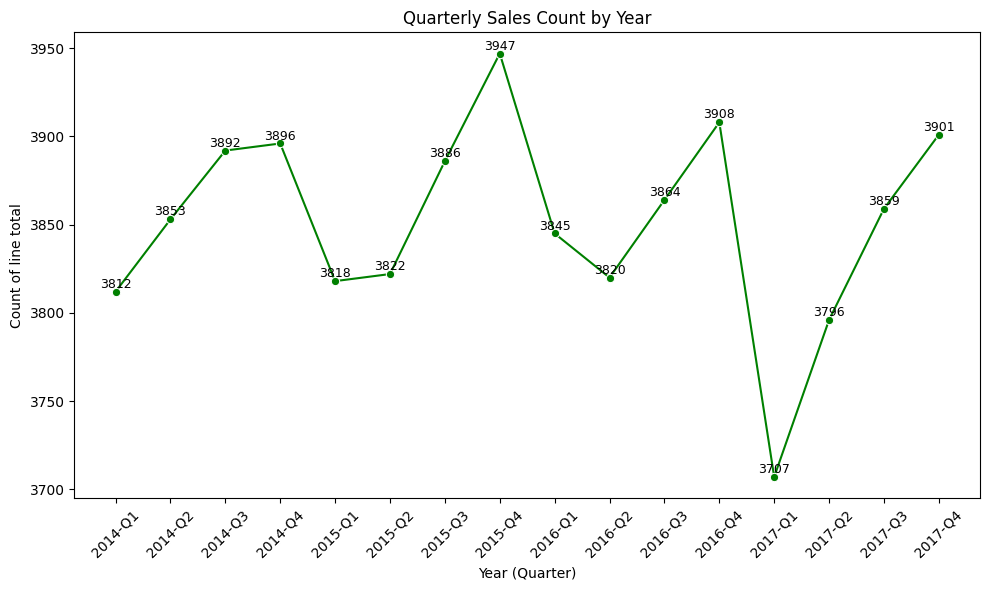

In [165]:
print(df_2014_2018.groupby('year', observed=True)['line total'].count())
print(df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].count())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].count().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['quarter'].astype(str)

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_grouped, x="year_quarter", y="line total", color="green", marker="o")
for i, row in df_grouped.iterrows():
    ax.text(i, row['line total'] + 0.5,
            str(row['line total']), 
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Year (Quarter)")
plt.ylabel("Count of line total")
plt.title("Quarterly Sales Count by Year")
plt.tight_layout()
plt.show()

year
2014    19253.266634
2015    19285.898688
2016    19309.689059
2017    19250.726384
Name: line total, dtype: float64


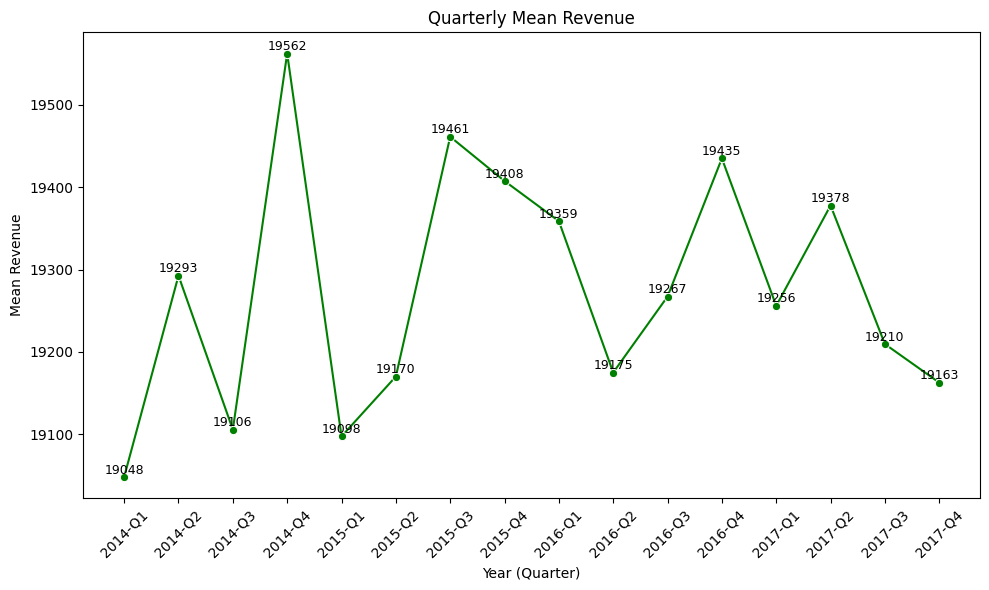

In [166]:
print(df_2014_2018.groupby('year', observed=True)['line total'].mean())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].mean().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['quarter'].astype(str)

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_grouped, x="year_quarter", y="line total", color="green", marker="o")

for i, row in df_grouped.iterrows():
    ax.text(i, row['line total'] + 0.5, f"{row['line total']:.0f}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Year (Quarter)")
plt.ylabel("Mean Revenue")
plt.title("Quarterly Mean Revenue")
plt.tight_layout()
plt.show()

year
2014    297520729.3
2015    298410710.4
2016    298083670.0
2017    293823836.8
Name: line total, dtype: float64


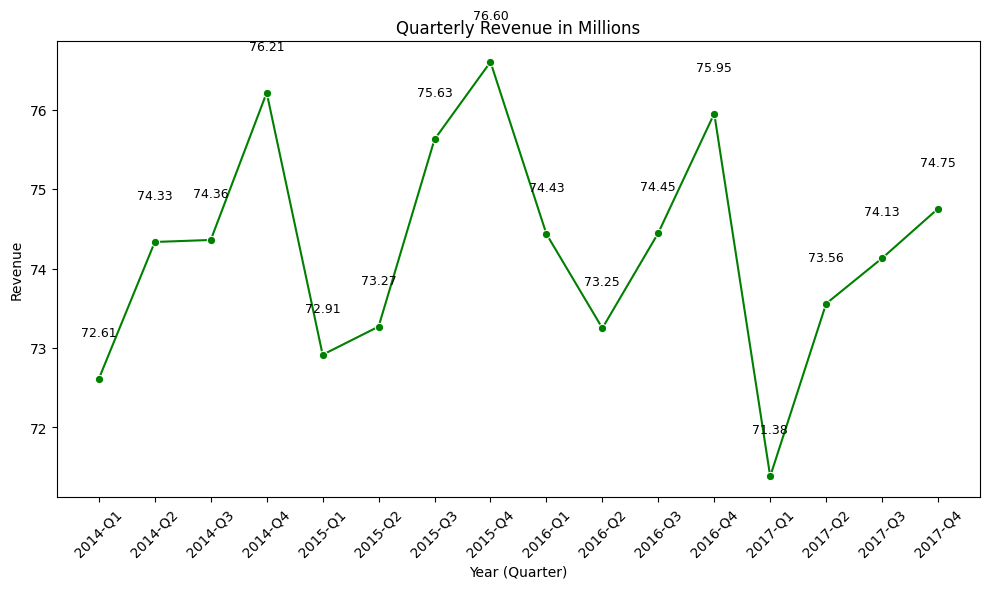

In [167]:
print(df_2014_2018.groupby('year', observed=True)['line total'].sum())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].sum().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['quarter'].astype(str)

df_grouped['line total'] = df_grouped['line total'] / 1_000_000

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_grouped, x="year_quarter", y="line total", color="green", marker="o")

for i, row in df_grouped.iterrows():
    ax.text(i, row['line total'] + 0.5, f"{row['line total']:.2f}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Year (Quarter)")
plt.ylabel("Revenue")
plt.title("Quarterly Revenue in Millions")
plt.tight_layout()
plt.show()

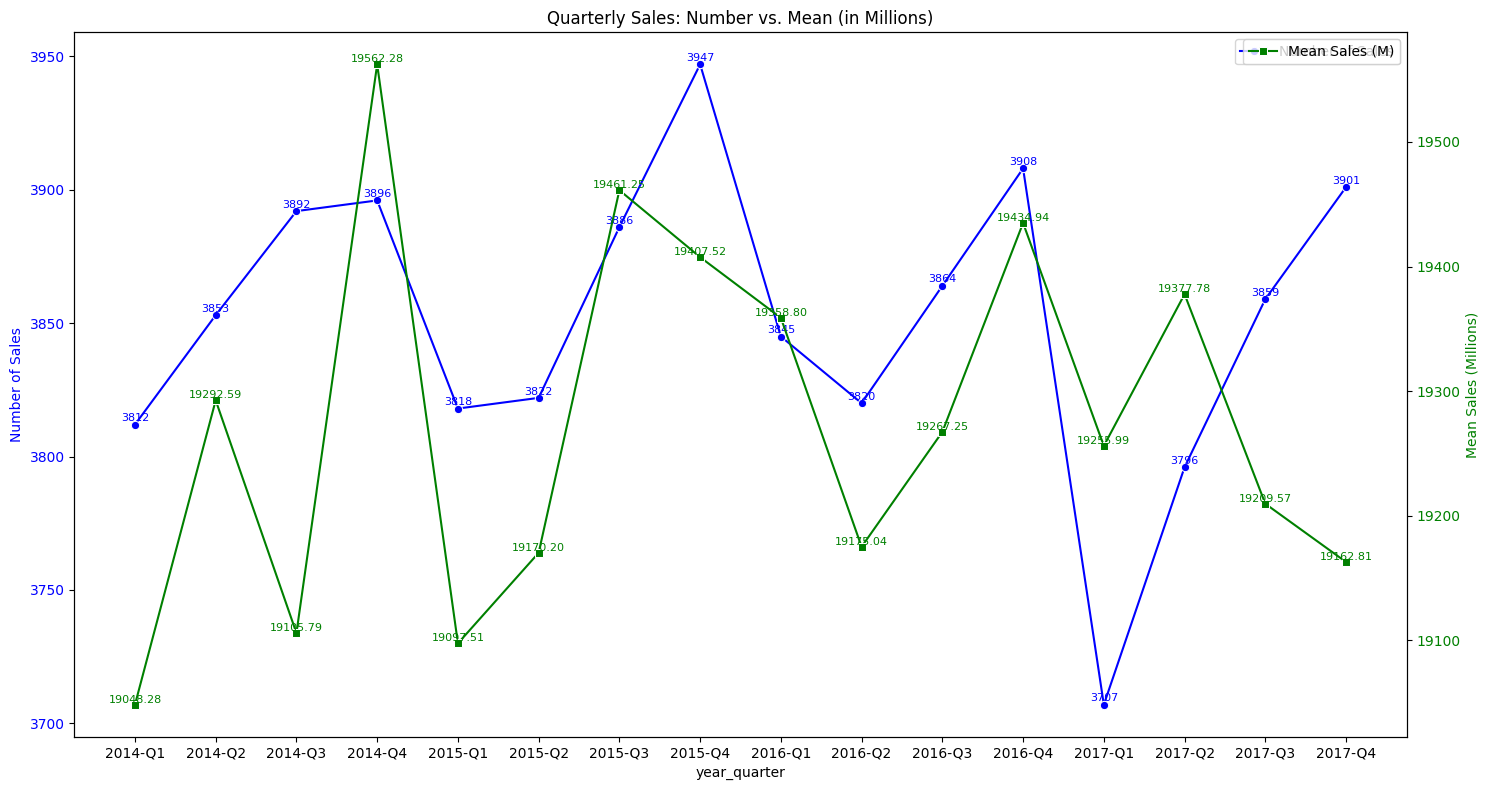

In [168]:
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].agg(count='count', mean='mean').reset_index())
df_grouped['year_quarter'] = (df_grouped['year'].astype(str) + "-Q" + df_grouped['quarter'].astype(str))

fig, ax1 = plt.subplots(figsize=(15,8))

sns.lineplot(data=df_grouped, x="year_quarter", y="count", ax=ax1, color="blue", marker="o", label="Number of Sales")

for i, row in df_grouped.iterrows():
    ax1.text(i, row['count'] + 0.5, f"{row['count']:.0f}", ha='center', va='bottom', fontsize=8, color="blue")
ax1.set_ylabel("Number of Sales", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(data=df_grouped, x="year_quarter", y="mean", ax=ax2, color="green", marker="s", label="Mean Sales (M)")

for i, row in df_grouped.iterrows():
    ax2.text(i, row['mean'] + 0.05, f"{row['mean']:.2f}", ha='center', va='bottom', fontsize=8, color="green")
ax2.set_ylabel("Mean Sales (Millions)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

plt.xticks(rotation=45)
plt.title("Quarterly Sales: Number vs. Mean (in Millions)")
fig.tight_layout()
plt.show()

year
2014    297520729.3
2015    298410710.4
2016    298083670.0
2017    293823836.8
Name: line total, dtype: float64


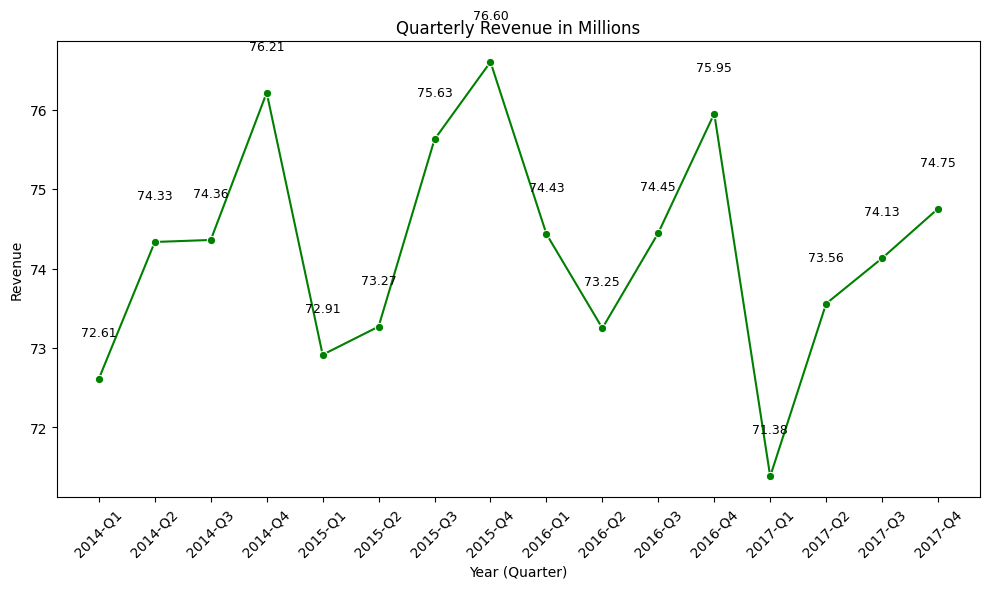

In [169]:
print(df_2014_2018.groupby('year', observed=True)['line total'].sum())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].sum().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['quarter'].astype(str)

df_grouped['line total'] = df_grouped['line total'] / 1_000_000

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_grouped, x="year_quarter", y="line total", color="green", marker="o")

for i, row in df_grouped.iterrows():
    ax.text(i, row['line total'] + 0.5, f"{row['line total']:.2f}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Year (Quarter)")
plt.ylabel("Revenue")
plt.title("Quarterly Revenue in Millions")
plt.tight_layout()
plt.show()

Observation

Yearly sales climb slowly from Q1 to Q4. Q4 has the highest sales.
2017 Q1 and Q4 show significant dip in sales and revenue compared to other years

***Sales per Month***

year
2014    15453
2015    15473
2016    15437
2017    15263
Name: line total, dtype: int64
Total sales per month:
   month  line total
0      1        1234
1      2        1134
2      3        1339
3      4        1220
4      5        1348
5      6        1228
6      7        1292
7      8        1269
8      9        1298
9     10        1304
10    11        1284
11    12        1313

Descriptives for sales per quarter:
        count          mean           std    min       25%       50%  \
month                                                                  
1      1234.0  19462.886467  15855.095036  837.5  8024.925  13875.70   
2      1134.0  18731.557496  15302.485312  837.5  8098.625  12880.75   
3      1339.0  19509.454294  15075.853263  837.5  8066.800  15436.80   
4      1220.0  19219.663934  15639.991405  837.5  8060.100  13668.00   
5      1348.0  19546.529303  15223.113522  837.5  8308.000  14257.60   
6      1228.0  19349.621824  15621.384264  837.5  8008.175  14458.60   

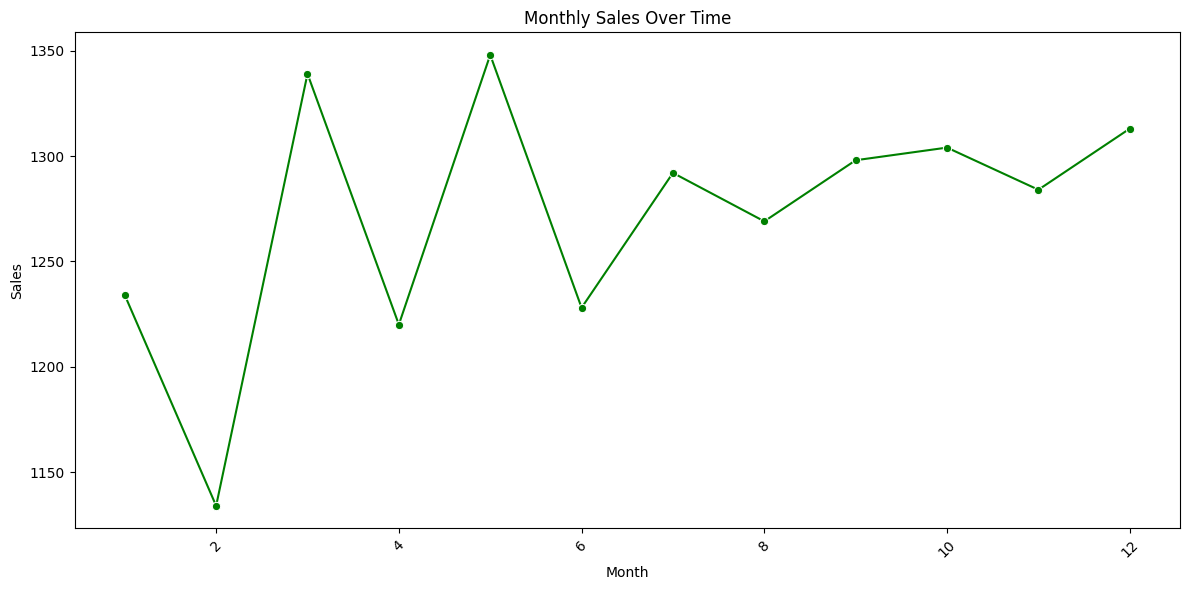

Total sales per month:
   month  line total
0      1        5203
1      2        4759
2      3        5220
3      4        4971
4      5        5273
5      6        5047
6      7        5164
7      8        5177
8      9        5160
9     10        5251
10    11        5143
11    12        5258

Descriptives for sales per quarter:
        count          mean           std    min      25%       50%  \
month                                                                 
1      5203.0  19109.401845  15427.366358  837.5  7973.00  13929.30   
2      4759.0  19185.329628  15396.422772  837.5  7906.00  13936.00   
3      5220.0  19274.645996  15480.842275  837.5  7869.15  13976.20   
4      4971.0  19156.056126  15244.627537  837.5  8093.60  14150.40   
5      5273.0  19395.432676  15489.965798  837.5  8040.00  13989.60   
6      5047.0  19202.039370  15449.290914  837.5  7902.65  13949.40   
7      5164.0  18819.752479  15158.587314  837.5  7879.20  13832.15   
8      5177.0  19692.297817 

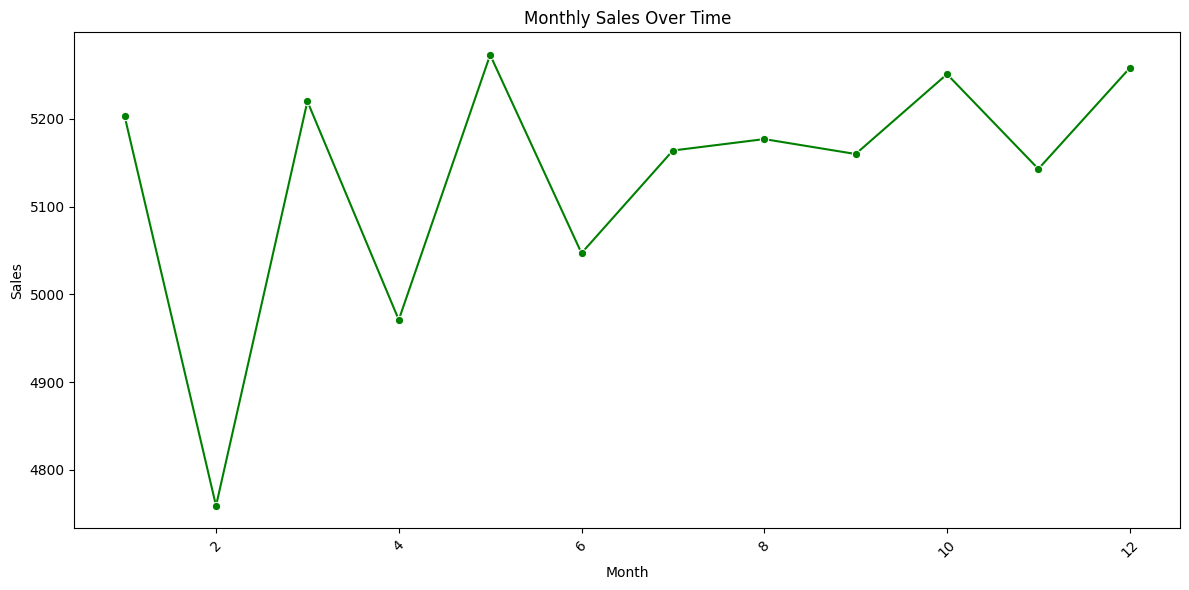

In [170]:
print(df_2014_2018.groupby('year', observed=True)['line total'].count())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].count().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['line total'].astype(str)

for eachyear in target_years: 
    monthly_sales = eachyear.groupby('month', observed=True)['line total'].count().reset_index()

    print("Total sales per month:")
    print(monthly_sales)
    print()
    
    print("Descriptives for sales per quarter:")
    print(eachyear.groupby('month', observed=True)['line total'].describe())
    print()

    print("Descriptives for sales for the whole year:")
    print(eachyear['line total'].describe())
    print()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_sales, x='month', y='line total', marker='o', color="green")

    y_offset = monthly_sales['line total'].max() * 0.02  
    for _, row in monthly_sales.iterrows():
        ax.text(row['month'], row['line total'] + y_offset, f"{row['line total']:,}", 
                ha='center', va='bottom', fontsize=9, color='black')
        
    plt.xticks(rotation=45)
    plt.title('Monthly Sales Over Time')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.tight_layout()

    plt.show()

year
2014    19253.266634
2015    19285.898688
2016    19309.689059
2017    19250.726384
Name: line total, dtype: float64
Total sales per month:
   month  line total
0      1  24017201.9
1      2  21241586.2
2      3  26123159.3
3      4  23447990.0
4      5  26348721.5
5      6  23761335.6
6      7  24070011.3
7      8  25301062.6
8      9  24758657.4
9     10  25366709.2
10    11  24364844.8
11    12  25022557.0

Descriptives for sales per quarter:
        count          mean           std    min       25%       50%  \
month                                                                  
1      1234.0  19462.886467  15855.095036  837.5  8024.925  13875.70   
2      1134.0  18731.557496  15302.485312  837.5  8098.625  12880.75   
3      1339.0  19509.454294  15075.853263  837.5  8066.800  15436.80   
4      1220.0  19219.663934  15639.991405  837.5  8060.100  13668.00   
5      1348.0  19546.529303  15223.113522  837.5  8308.000  14257.60   
6      1228.0  19349.621824  15621.384264

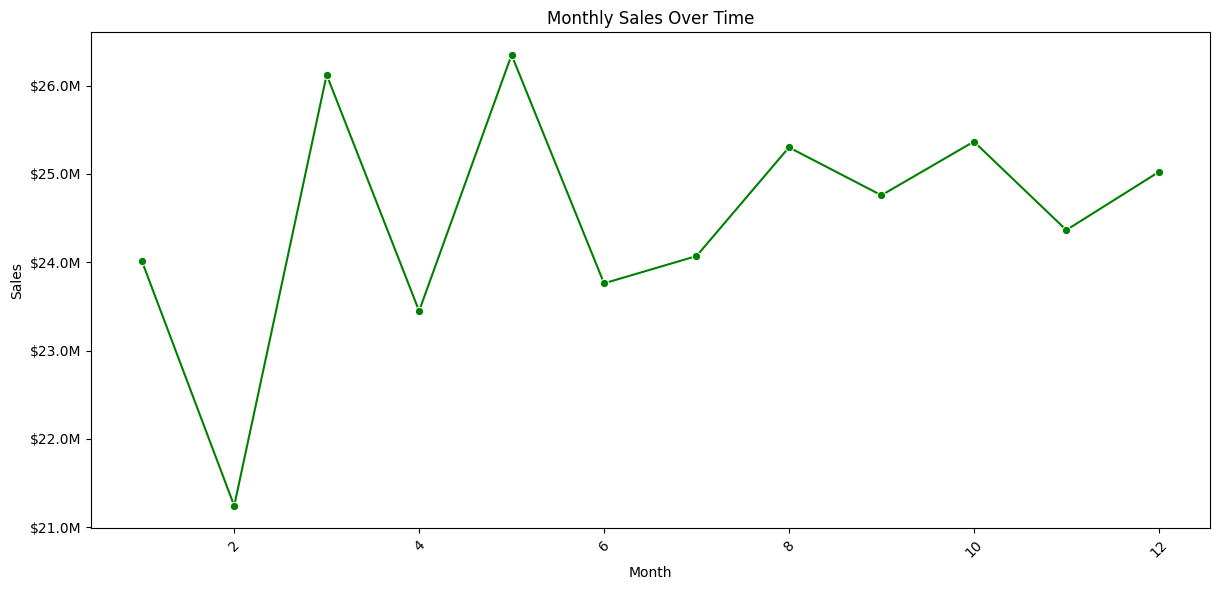

Total sales per month:
   month   line total
0      1   99426217.8
1      2   91302983.7
2      3  100613652.1
3      4   95224755.0
4      5  102272116.5
5      6   96912692.7
6      7   97185201.8
7      8  101947025.8
8      9   99432301.4
9     10  100988872.2
10    11  101285199.8
11    12  101247927.7

Descriptives for sales per quarter:
        count          mean           std    min      25%       50%  \
month                                                                 
1      5203.0  19109.401845  15427.366358  837.5  7973.00  13929.30   
2      4759.0  19185.329628  15396.422772  837.5  7906.00  13936.00   
3      5220.0  19274.645996  15480.842275  837.5  7869.15  13976.20   
4      4971.0  19156.056126  15244.627537  837.5  8093.60  14150.40   
5      5273.0  19395.432676  15489.965798  837.5  8040.00  13989.60   
6      5047.0  19202.039370  15449.290914  837.5  7902.65  13949.40   
7      5164.0  18819.752479  15158.587314  837.5  7879.20  13832.15   
8      5177.0  

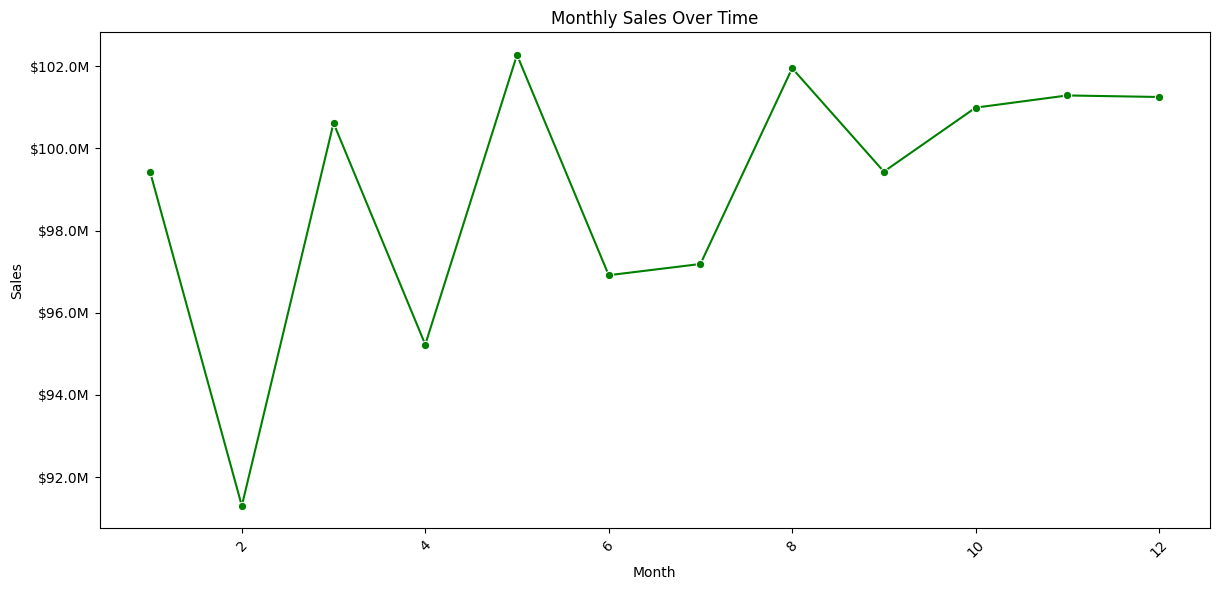

In [171]:
print(df_2014_2018.groupby('year', observed=True)['line total'].mean())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['line total'].mean().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['line total'].astype(str)

for eachyear in target_years: 
    monthly_sales = eachyear.groupby('month', observed=True)['line total'].sum().reset_index()

    print("Total sales per month:")
    print(monthly_sales)
    print()
    
    print("Descriptives for sales per quarter:")
    print(eachyear.groupby('month', observed=True)['line total'].describe())
    print()

    print("Descriptives for sales for the whole year:")
    print(eachyear['line total'].describe())
    print()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_sales, x='month', y='line total', marker='o', color="green")

    y_offset = monthly_sales['line total'].max() * 0.02  
    for _, row in monthly_sales.iterrows():
        ax.text(row['month'], row['line total'] + y_offset, f"{row['line total']:,}", 
                ha='center', va='bottom', fontsize=9, color='black')
        
    plt.xticks(rotation=45)
    plt.title('Monthly Sales Over Time')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.tight_layout()

    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x*1e-6:.1f}M'))

    plt.show()

Observation

Sales per Month:

Sales are lower in February
Lowest sales per month are: February, April, June & July

February negatively impacts sales in Q1
April negatively impacts sales in Q2

Highest sales are in May & August
Sales are consistently high in Q4: October, November and December are Ranked between 3rd and 5th in Sales

**Profit**

***Profit per Quarter***

year
2014    1.112384e+08
2015    1.119039e+08
2016    1.111529e+08
2017    1.096231e+08
Name: profit, dtype: float64
year  quarter
2014  1          27076362.28
      2          27949915.67
      3          27506379.01
      4          28705756.01
2015  1          27345331.55
      2          27546096.22
      3          28243693.96
      4          28768758.04
2016  1          27903078.93
      2          27312174.58
      3          27550771.78
      4          28386859.32
2017  1          26897858.53
      2          27240579.82
      3          27451462.87
      4          28033238.49
Name: profit, dtype: float64


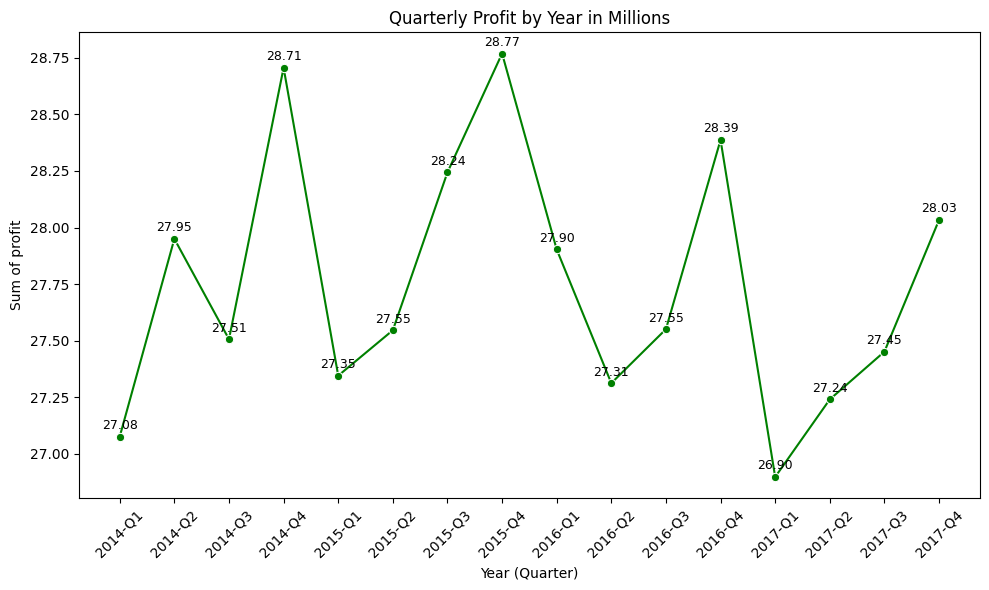

In [172]:
print(df_2014_2018.groupby('year', observed=True)['profit'].sum())
print(df_2014_2018.groupby(['year', 'quarter'], observed=True)['profit'].sum())
df_grouped = (df_2014_2018.groupby(['year', 'quarter'], observed=True)['profit'].sum().reset_index())
df_grouped['year_quarter'] = df_grouped['year'].astype(str) + "-Q" + df_grouped['quarter'].astype(str)

df_grouped['profit'] = df_grouped['profit'] / 1000000

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_grouped, x="year_quarter", y="profit", color="green", marker="o")
for i, row in df_grouped.iterrows():
    ax.text(i, row['profit'] + 0.02,
            str(f"{row['profit']:.2f}"), 
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.xlabel("Year (Quarter)")
plt.ylabel("Sum of profit")
plt.title("Quarterly Profit by Year in Millions")
plt.tight_layout()
plt.show()

Observation

Despite lower sales in Q1, profit is somewhat equal from Q1 to Q3.
Profit is only raised in Q4.

***Profit per Month***

Total profit per month:
   month      profit
0      1  9066998.43
1      2  8016276.42
2      3  9814583.68
3      4  8687758.68
4      5  9766795.24
5      6  8786025.90
6      7  8802611.94
7      8  9420856.09
8      9  9227994.84
9     10  9626238.48
10    11  9109485.93
11    12  9297514.08

Descriptives for profit per month:
        count         mean          std     min        25%       50%  \
month                                                                  
1      1234.0  7347.648647  6865.592540  205.02  2569.8850  5077.360   
2      1134.0  7069.026825  6833.688685  205.02  2389.5375  4738.980   
3      1339.0  7329.786169  6596.394743  182.24  2654.8700  5176.150   
4      1220.0  7121.113672  6635.367780  144.72  2505.7675  5065.200   
5      1348.0  7245.397062  6402.269902  201.00  2609.7825  5325.265   
6      1228.0  7154.744218  6472.265400  125.62  2560.1025  5200.875   
7      1292.0  6813.167136  6295.306709  125.62  2432.3500  4648.395   
8      1269.0  7423

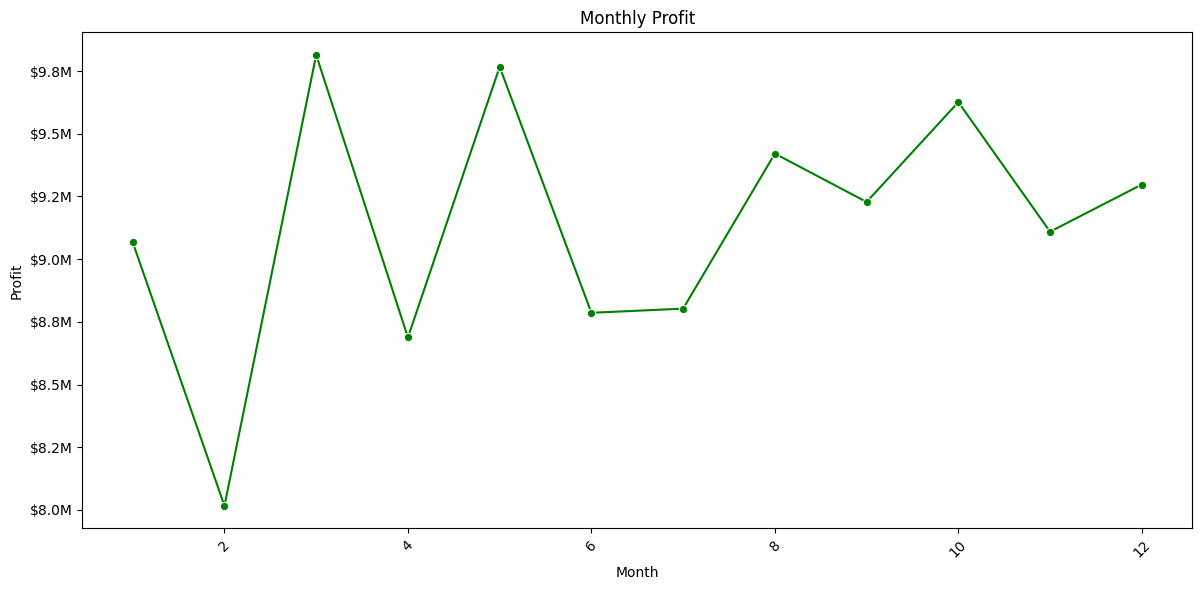

Total profit per month:
   month       profit
0      1  37355529.13
1      2  34336759.76
2      3  37530342.40
3      4  35524458.77
4      5  38685314.57
5      6  35838992.95
6      7  35855119.41
7      8  37806623.49
8      9  37090564.72
9     10  37920807.75
10    11  37893394.64
11    12  38080409.47

Descriptives for profit per month:
        count         mean          std     min        25%       50%  \
month                                                                  
1      5203.0  7179.613517  6597.897066  125.62  2491.8000  5050.120   
2      4759.0  7215.120773  6700.627864  167.23  2460.2400  5004.900   
3      5220.0  7189.720766  6638.248348  125.62  2479.6350  5104.095   
4      4971.0  7146.340529  6514.108426  125.62  2570.1850  5116.660   
5      5273.0  7336.490531  6766.961771  125.62  2512.5000  5227.340   
6      5047.0  7101.048732  6416.558063  125.62  2566.4350  5105.000   
7      5164.0  6943.284162  6309.211074  125.62  2492.4000  4894.015   
8     

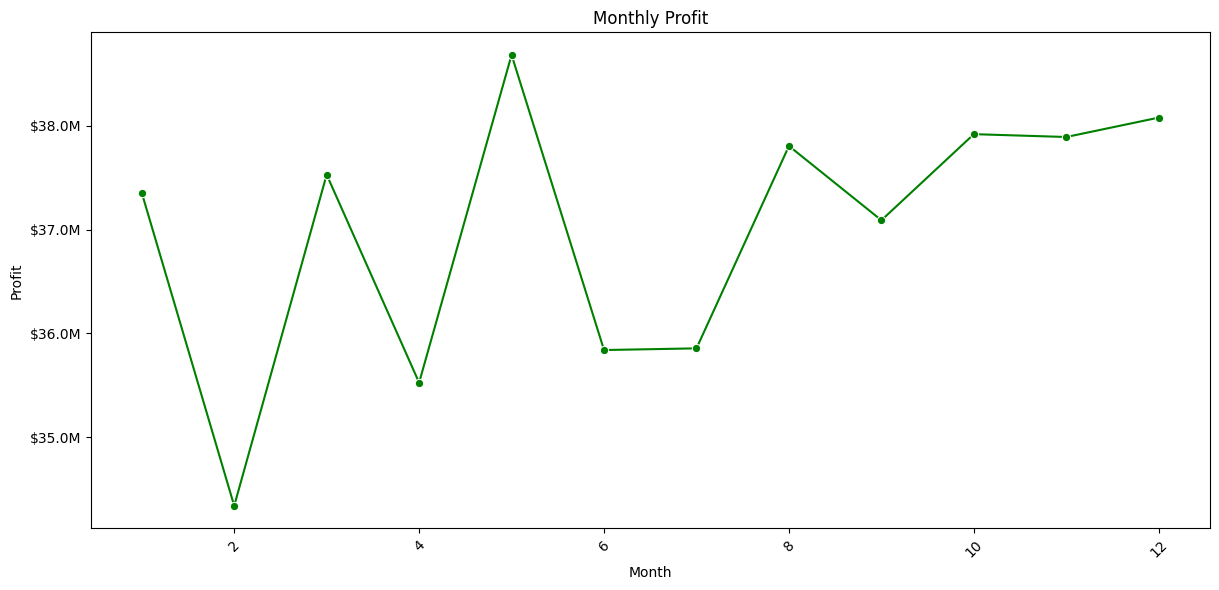

In [173]:
for eachyear in target_years: 
    # Group by month and sum Line Total
    monthly_profit = eachyear.groupby('month', observed=True)['profit'].sum().reset_index()

    # Total profit per month
    print("Total profit per month:")
    print(monthly_profit)
    print()

    # Descriptives for profit per month
    print("Descriptives for profit per month:")
    print(eachyear.groupby('month', observed=True)['profit'].describe())
    print()

    # Descriptives for profit for the whole year
    print("Descriptives for profit for the whole year:")
    print(eachyear['profit'].describe())
    print()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_profit, x='month', y='profit', color="green", marker='o')
    plt.xticks(rotation=45)
    plt.title('Monthly Profit')
    plt.xlabel('Month')
    plt.ylabel('Profit')
    plt.tight_layout()

    # Format y-axis labels to millions
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x*1e-6:.1f}M'))

    plt.show()

Observation

Profit is lowest in February
Lowest Profit Months are February, April, June & July

Highest Profit Month is May
Despite high sales in August (Rank 2), Profit is lower (Rank 5)
This points to lower profit margins in August

**Profit Margins**

***Sale Profit Margins per Quarter***

Total profit margin per quarter:
  quarter  profit margin
0       1  621422.086054
1       2  633758.321171
2       3  646820.528561
3       4  653661.747157

Descriptives for profit margins per quarter:
          count        mean        std         min         25%         50%  \
quarter                                                                      
1        3707.0  167.634768  38.012796  117.647059  135.135135  158.730159   
2        3796.0  166.954247  37.477684  117.647059  135.135135  158.730159   
3        3859.0  167.613508  37.833446  117.647059  135.135135  158.730159   
4        3901.0  167.562611  37.665213  117.647059  135.135135  158.730159   

                75%    max  
quarter                     
1        196.078431  250.0  
2        192.307692  250.0  
3        196.078431  250.0  
4        196.078431  250.0  

Descriptives for profit margins for the whole year:
count    15263.000000
mean       167.441701
std         37.743382
min        117.647059
25%        1

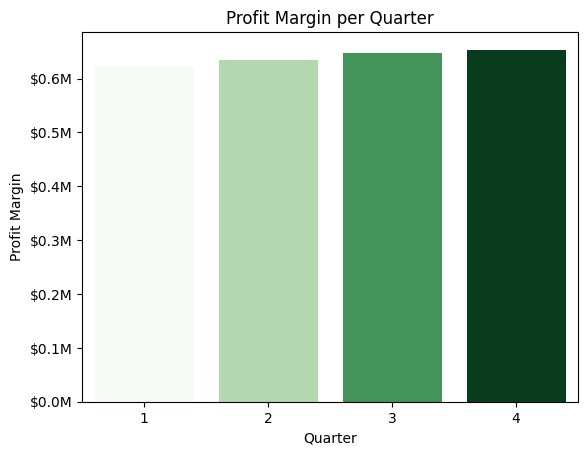

Total profit margin per quarter:
  quarter  profit margin
0       1   2.542428e+06
1       2   2.566711e+06
2       3   2.589841e+06
3       4   2.622058e+06

Descriptives for profit margins per quarter:
           count        mean        std         min         25%         50%  \
quarter                                                                       
1        15182.0  167.463344  37.683653  117.647059  135.135135  158.730159   
2        15291.0  167.857644  37.720996  117.647059  135.135135  158.730159   
3        15501.0  167.075740  37.676053  117.647059  135.135135  158.730159   
4        15652.0  167.522249  37.649478  117.647059  135.135135  158.730159   

                75%    max  
quarter                     
1        196.078431  250.0  
2        196.078431  250.0  
3        196.078431  250.0  
4        196.078431  250.0  

Descriptives for profit margins for the whole year:
count    61626.000000
mean       167.478646
std         37.682441
min        117.647059
25%   

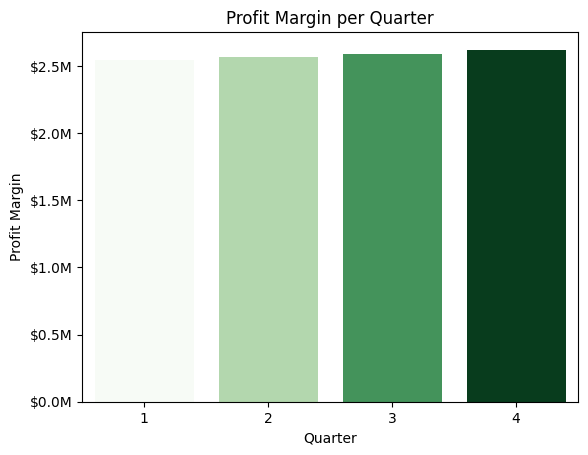

In [174]:
for eachyear in target_years: 
    # Group by quarter and profit margin
    quarterly_margins = eachyear.groupby('quarter', observed=True)['profit margin'].sum().reset_index()

    # Total profit margin per quarter
    print("Total profit margin per quarter:")
    print(quarterly_margins)
    print()

    # Descriptives for profit margins per quarter
    print("Descriptives for profit margins per quarter:")
    print(eachyear.groupby('quarter', observed=True)['profit margin'].describe())
    print()

    # Descriptives for profit margins for the whole year
    print("Descriptives for profit margins for the whole year:")
    print(eachyear['profit margin'].describe())
    print()

    # Make sure 'quarter' is numeric for correct plotting order
    quarterly_margins['quarter'] = quarterly_margins['quarter'].astype(int)

    # Plot
    sns.barplot(data=quarterly_margins, x='quarter', y='profit margin', hue='quarter', palette='Greens', legend=False)
    plt.title('Profit Margin per Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Profit Margin')

    # Format y-axis labels to millions
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x*1e-6:.1f}M'))

    plt.show()

***Sale Profit Margins per Month***

Total profit margin per month:
   month  profit margin
0      1  207650.511510
1      2  189151.268565
2      3  224620.305980
3      4  203155.136695
4      5  225095.563241
5      6  205507.621235
6      7  214208.319586
7      8  213228.330824
8      9  219383.878150
9     10  220317.933958
10    11  213734.074568
11    12  219609.738630

Descriptives for profit margins per month:
        count        mean        std         min         25%         50%  \
month                                                                      
1      1234.0  168.274321  38.301278  117.647059  135.135135  158.730159   
2      1134.0  166.800060  37.829853  117.647059  135.135135  156.250000   
3      1339.0  167.752282  37.915860  117.647059  135.135135  158.730159   
4      1220.0  166.520604  37.373650  117.647059  135.135135  158.730159   
5      1348.0  166.984839  36.911817  117.647059  135.135135  158.730159   
6      1228.0  167.351483  38.216071  117.647059  135.135135  158.730159   
7    

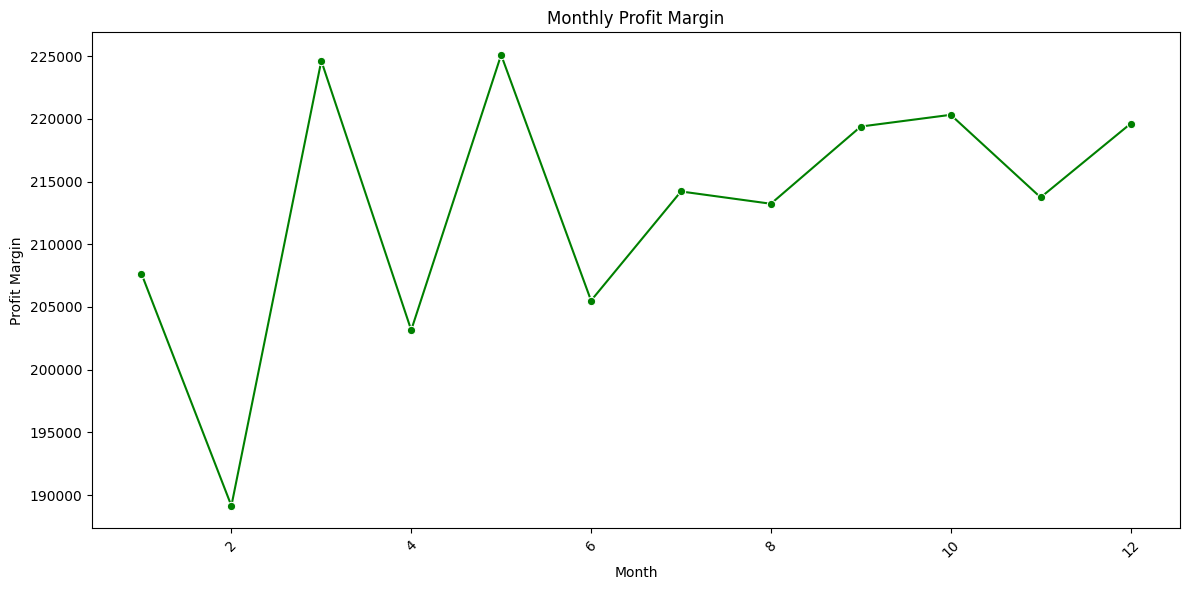

Total profit margin per month:
   month  profit margin
0      1  872471.420973
1      2  796889.117371
2      3  873067.946348
3      4  834561.263578
4      5  887609.844768
5      6  844540.132117
6      7  861739.552346
7      8  863151.968984
8      9  864949.525350
9     10  879351.562733
10    11  860202.911763
11    12  882503.767678

Descriptives for profit margins per month:
        count        mean        std         min         25%         50%  \
month                                                                      
1      5203.0  167.686224  37.675699  117.647059  135.135135  158.730159   
2      4759.0  167.448858  37.511958  117.647059  135.135135  158.730159   
3      5220.0  167.254396  37.853352  117.647059  135.135135  158.730159   
4      4971.0  167.885991  37.897893  117.647059  135.135135  158.730159   
5      5273.0  168.331091  37.705585  117.647059  135.135135  158.730159   
6      5047.0  167.335077  37.562861  117.647059  135.135135  158.730159   
7    

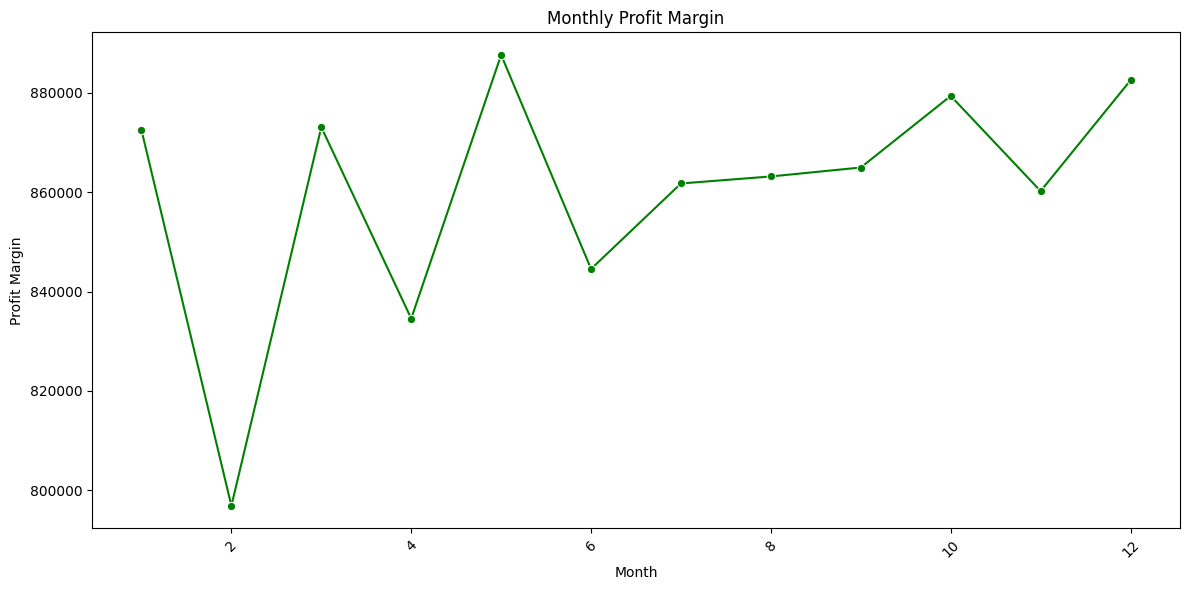

In [175]:
for eachyear in target_years: 
    # Group by month and profit margin
    monthly_margins = eachyear.groupby('month', observed=True)['profit margin'].sum().reset_index()

    # Total profit margin per month
    print("Total profit margin per month:")
    print(monthly_margins)
    print()

    # Descriptives for profit margins per month
    print("Descriptives for profit margins per month:")
    print(eachyear.groupby('month', observed=True)['profit margin'].describe())
    print()

    # Descriptives for profit margins for the whole year
    print("Descriptives for profit margins for the whole year:")
    print(eachyear['profit margin'].describe())
    print()

    # Make sure 'month' is numeric for correct plotting order
    monthly_margins['month'] = monthly_margins['month'].astype(int)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_margins, x='month', y='profit margin', color="green", marker='o')
    plt.xticks(rotation=45)
    plt.title('Monthly Profit Margin')
    plt.xlabel('Month')
    plt.ylabel('Profit Margin')
    plt.tight_layout()

    plt.show()

Observation

In august and november profit margins are lower, but profit is generated by higher sales volumes. 
Overall, sales, profit and profit margins are lower in february. 

***Unit Profit Margin per Quarter***

Total product profit margin per quarter:
  quarter  product profit margin
0       1             853.410774
1       2             853.125261
2       3             843.196146
3       4             851.429542

Descriptives for product profit margins per quarter:
          count        mean         std     min        25%      50%  \
quarter                                                               
1        3707.0  853.410774  731.614954  25.125  333.25800  598.444   
2        3796.0  853.125261  714.964031  25.125  333.71025  611.710   
3        3859.0  843.196146  705.781731  25.125  334.43050  598.980   
4        3901.0  851.429542  730.094429  25.125  331.65000  603.000   

               75%       max  
quarter                       
1        1192.5330  3863.220  
2        1205.2965  3847.140  
3        1210.8910  3596.560  
4        1211.4270  3830.457  

Descriptives for product profit margins for the whole year:
count    15263.000000
mean       850.250790
std        720.575314


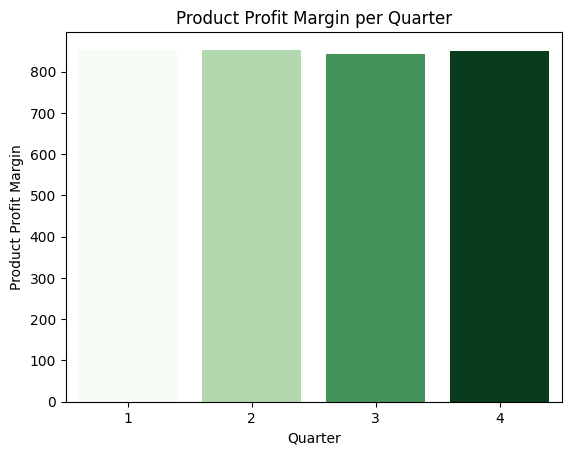

Total product profit margin per quarter:
  quarter  product profit margin
0       1             850.367036
1       2             855.626009
2       3             845.349283
3       4             858.821718

Descriptives for product profit margins per quarter:
           count        mean         std     min      25%       50%       75%  \
quarter                                                                         
1        15182.0  850.367036  725.681170  25.125  329.975  599.6165  1201.980   
2        15291.0  855.626009  721.894853  25.125  337.680  607.2210  1203.990   
3        15501.0  845.349283  713.710011  25.125  336.139  603.0000  1189.920   
4        15652.0  858.821718  731.988476  25.125  336.072  609.5660  1211.628   

             max  
quarter           
1        3863.22  
2        3863.22  
3        3847.14  
4        3863.22  

Descriptives for product profit margins for the whole year:
count    61626.000000
mean       852.557142
std        723.363789
min         

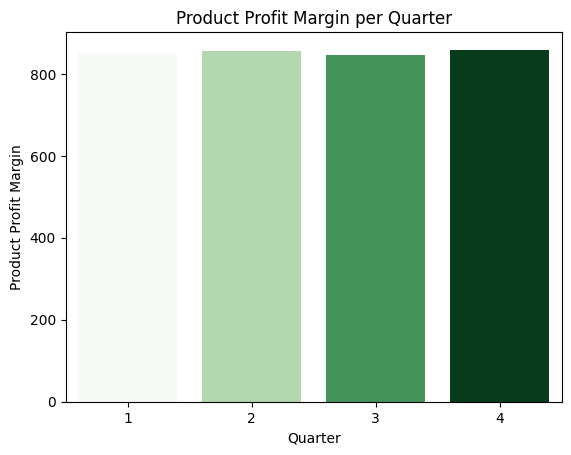

In [176]:
for eachyear in target_years: 
    # Group by quarter and product profit margin
    quarterly_pmargins = eachyear.groupby('quarter', observed=True)['product profit margin'].mean().reset_index()

    # Average product profit margin per quarter
    print("Total product profit margin per quarter:")
    print(quarterly_pmargins)
    print()

    # Descriptives for product profit margins per quarter
    print("Descriptives for product profit margins per quarter:")
    print(eachyear.groupby('quarter', observed=True)['product profit margin'].describe())
    print()

    # Descriptives for product profit margins for the whole year
    print("Descriptives for product profit margins for the whole year:")
    print(eachyear['product profit margin'].describe())
    print()

    # Make sure 'quarter' is numeric for correct plotting order
    quarterly_pmargins['quarter'] = quarterly_pmargins['quarter'].astype(int)

    # Plot
    sns.barplot(data=quarterly_pmargins, x='quarter', y='product profit margin', hue='quarter', palette='Greens', legend=False)
    plt.title('Product Profit Margin per Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Product Profit Margin')

    plt.show()

***Unit Profit Margin per Month***

Average product profit margin per month:
   month  product profit margin
0      1             863.146286
1      2             833.945810
2      3             860.923580
3      4             843.914426
4      5             860.723950
5      6             853.934860
6      7             808.854959
7      8             874.012043
8      9             847.251184
9     10             868.302017
10    11             839.507965
11    12             846.330988

Descriptives for product profit margins per month:
        count        mean         std     min        25%       50%  \
month                                                                
1      1234.0  863.146286  729.143801  31.088  356.22225  611.3750   
2      1134.0  833.945810  736.457546  30.150  306.47475  564.4080   
3      1339.0  860.923580  730.001342  25.125  334.86600  611.0400   
4      1220.0  843.914426  729.482134  28.944  332.75550  592.2800   
5      1348.0  860.723950  708.020458  25.125  337.71350  655.0590   
6

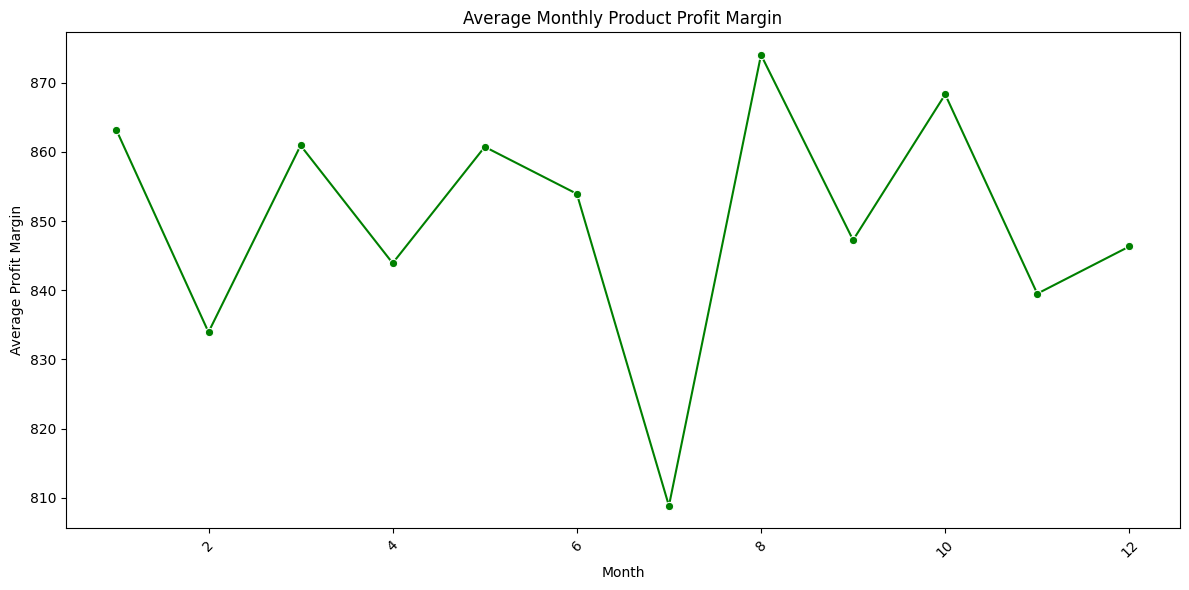

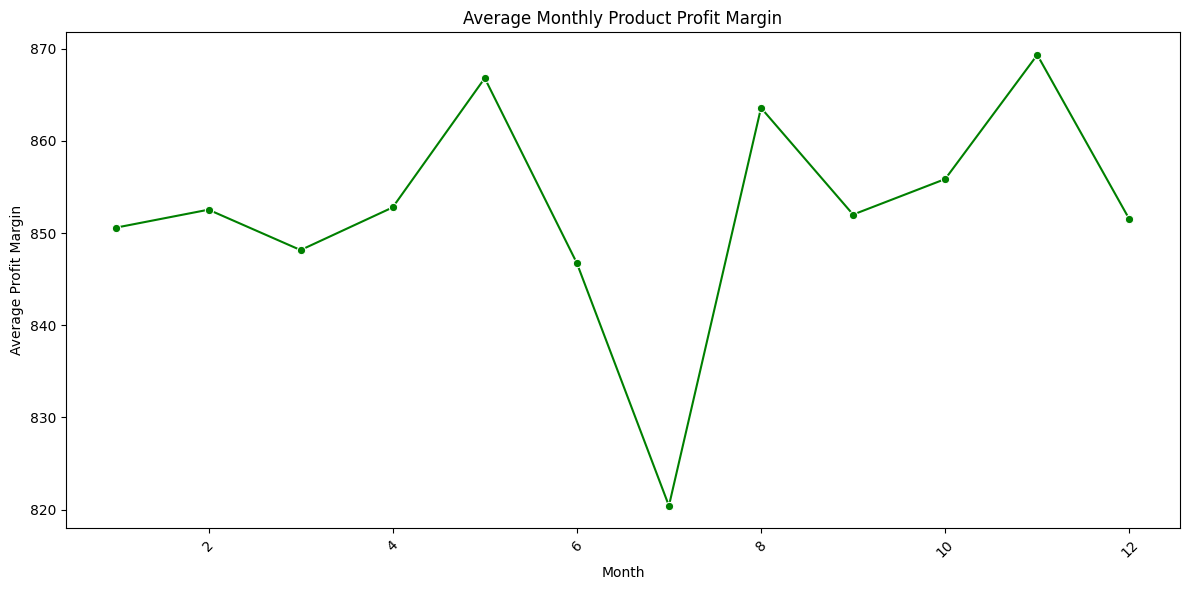

In [177]:
for eachyear in target_years: 
    # Group by month and product profit margin
    monthly_pmargins = eachyear.groupby('month', observed=True)['product profit margin'].mean().reset_index()

    # Average product profit margin per month
    print("Average product profit margin per month:")
    print(monthly_pmargins)
    print()

    # Descriptives for product profit margins per month
    print("Descriptives for product profit margins per month:")
    print(eachyear.groupby('month', observed=True)['product profit margin'].describe())
    print()

    # Descriptives for product profit margins for the whole year
    print("Descriptives for product profit margins for the whole year:")
    print(eachyear['product profit margin'].describe())
    print()

    # Make sure 'month' is numeric for correct plotting order
    monthly_pmargins['month'] = monthly_pmargins['month'].astype(int)
    
    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_pmargins, x='month', y='product profit margin', color='green', marker='o')
    plt.xticks(rotation=45)
    plt.title('Average Monthly Product Profit Margin')
    plt.xlabel('Month')
    plt.ylabel('Average Profit Margin')
    plt.tight_layout()

OBSERVATION

The profit margin per unit is significantly lower in July in 2014-2017, and also in February in 2017

**Top Product Sales**

Top 10 Sales Per Product
product name
Product 25    1475
Product 26    1336
Product 13     981
Product 14     954
Product 15     853
Product 5      792
Product 2      765
Product 4      674
Product 3      642
Product 1      616
Name: count, dtype: int64

Top 10 Sales Per Product - Percentage
product name
Product 25    9.66
Product 26    8.75
Product 13    6.43
Product 14    6.25
Product 15    5.59
Product 5     5.19
Product 2     5.01
Product 4     4.42
Product 3     4.21
Product 1     4.04
Product 6     3.36
Product 20    3.26
Product 18    3.24
Product 17    3.16
Product 16    3.09
Product 19    2.99
Product 11    1.83
Product 12    1.77
Product 21    1.66
Product 27    1.58
Product 7     1.57
Product 28    1.55
Product 29    1.55
Product 8     1.52
Product 23    1.50
Product 30    1.47
Product 22    1.43
Product 10    1.36
Product 24    1.29
Product 9     1.27
Name: proportion, dtype: float64
Percentage Top 10: 59.55



/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_34674/1926958904.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


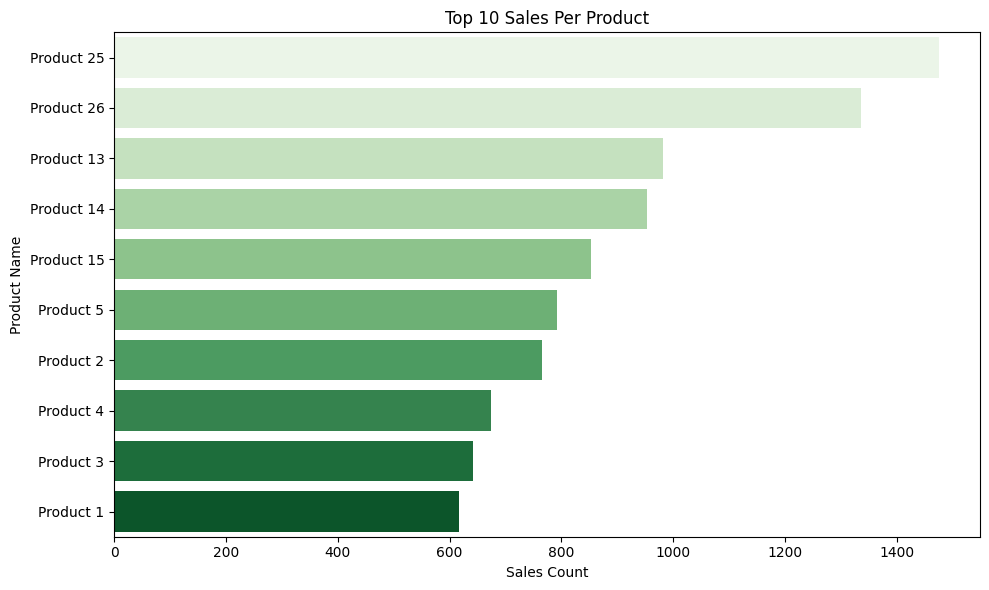

Top 10 Sales Per Product
product name
Product 25    5763
Product 26    5688
Product 13    3804
Product 14    3708
Product 15    3551
Product 5     3229
Product 2     3039
Product 1     2792
Product 4     2778
Product 3     2702
Name: count, dtype: int64

Top 10 Sales Per Product - Percentage
product name
Product 25    9.35
Product 26    9.23
Product 13    6.17
Product 14    6.02
Product 15    5.76
Product 5     5.24
Product 2     4.93
Product 1     4.53
Product 4     4.51
Product 3     4.38
Product 6     3.32
Product 18    3.24
Product 17    3.22
Product 20    3.09
Product 16    3.00
Product 19    2.80
Product 12    1.72
Product 27    1.68
Product 11    1.61
Product 30    1.59
Product 28    1.57
Product 8     1.56
Product 23    1.56
Product 21    1.54
Product 7     1.52
Product 29    1.50
Product 22    1.47
Product 10    1.35
Product 24    1.29
Product 9     1.25
Name: proportion, dtype: float64
Percentage Top 10: 60.12



/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_34674/1926958904.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


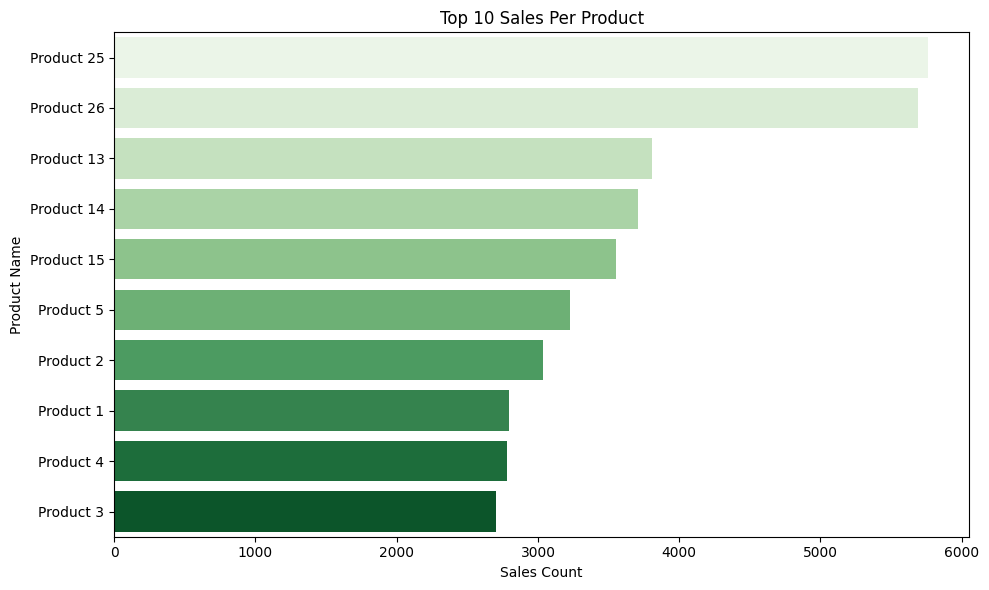

In [178]:
for eachyear in target_years:
    top10_sales_product = eachyear['product name'].value_counts().head(10)
    print("Top 10 Sales Per Product")
    print(top10_sales_product)
    top10_sales_product_pct = (eachyear['product name'].value_counts(normalize=True) * 100).round(2)  
    print("")
    print("Top 10 Sales Per Product - Percentage")
    print(top10_sales_product_pct)
    print("Percentage Top 10: " + str(top10_sales_product_pct.head(10).sum()))
    print("")

    top10_df = top10_sales_product.reset_index()
    top10_df.columns = ['Product Name', 'Sales Count']
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=top10_df,
        x='Sales Count',
        y='Product Name',
        palette='Greens'
    )
    plt.title(f"Top 10 Sales Per Product")
    plt.xlabel("Sales Count")
    plt.ylabel("Product Name")
    plt.tight_layout()
    plt.show()

***Top Product Revenue***

Top 10 Sales Revenue Per Product
product name
Product 25    26881867.3
Product 26    26632272.2
Product 13    19757435.7
Product 14    18580888.9
Product 5     16949251.3
Product 15    15821380.0
Product 2     13779327.2
Product 4     13587037.2
Product 1     12419361.2
Product 3     11652130.8
Name: line total, dtype: float64

Top 10 Sales Revenue Percentage Per Product
product name
Product 25    9.15
Product 26    9.06
Product 13    6.72
Product 14    6.32
Product 5     5.77
Product 15    5.38
Product 2     4.69
Product 4     4.62
Product 1     4.23
Product 3     3.97
Product 18    3.63
Product 20    3.34
Product 17    3.23
Product 6     3.20
Product 19    3.10
Product 16    2.91
Product 12    2.08
Product 11    2.08
Product 21    1.68
Product 8     1.67
Product 28    1.59
Product 10    1.40
Product 7     1.37
Product 27    1.32
Product 23    1.31
Product 30    1.28
Product 29    1.28
Product 22    1.23
Product 24    1.21
Product 9     1.16
Name: line total, dtype: float64
Percentage

/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_34674/1360987904.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


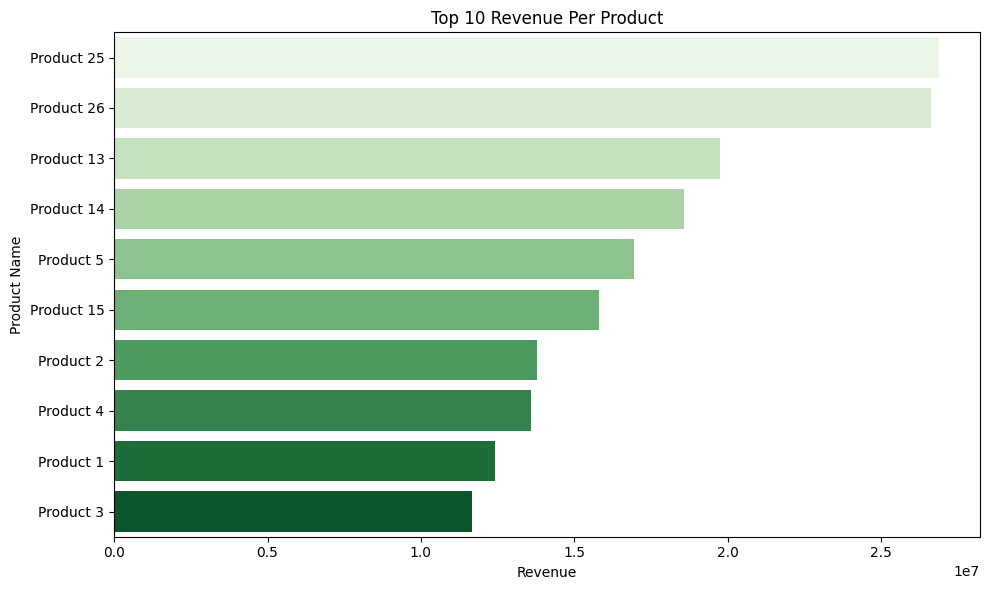

Top 10 Sales Revenue Per Product
product name
Product 26    112454990.9
Product 25    105715762.4
Product 13     75190019.7
Product 14     72516666.1
Product 5      68032711.2
Product 15     64933726.7
Product 2      54976803.1
Product 4      54558669.5
Product 1      53678832.2
Product 3      49935227.3
Name: line total, dtype: float64

Top 10 Sales Revenue Percentage Per Product
product name
Product 26    9.47
Product 25    8.90
Product 13    6.33
Product 14    6.10
Product 5     5.73
Product 15    5.47
Product 2     4.63
Product 4     4.59
Product 1     4.52
Product 3     4.20
Product 18    3.72
Product 6     3.29
Product 17    3.27
Product 20    3.23
Product 16    3.03
Product 19    2.78
Product 12    1.97
Product 11    1.81
Product 28    1.71
Product 8     1.61
Product 21    1.55
Product 23    1.54
Product 30    1.48
Product 27    1.48
Product 10    1.41
Product 7     1.38
Product 22    1.26
Product 29    1.23
Product 24    1.17
Product 9     1.16
Name: line total, dtype: float64


/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_34674/1360987904.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


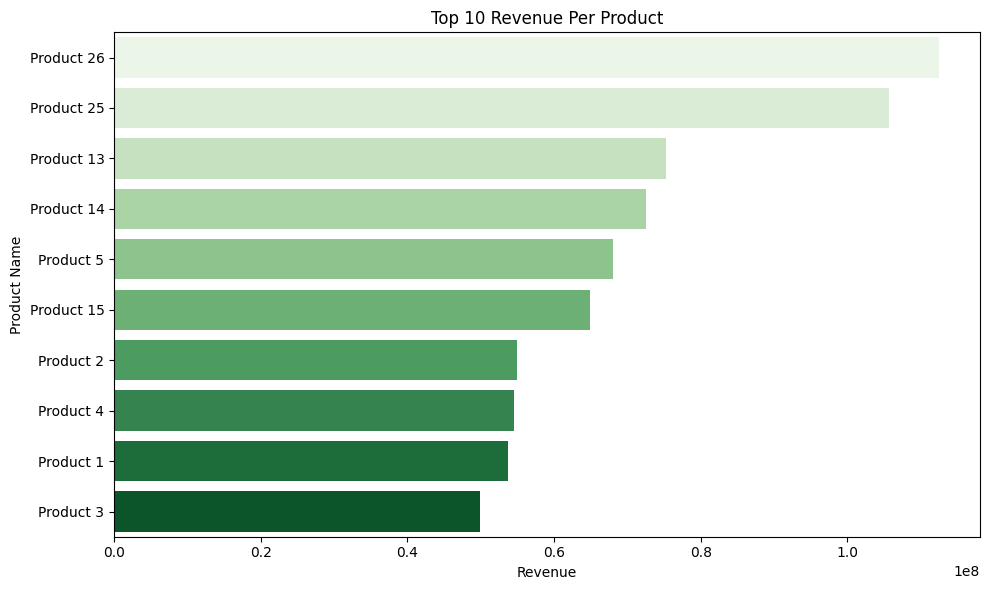

In [179]:
for eachyear in target_years:
    top10_revenue_product = eachyear.groupby('product name')['line total'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Sales Revenue Per Product")
    print(top10_revenue_product)
    print("")
    
    top10_revenue_product_pct = (eachyear.groupby('product name')['line total'].sum().sort_values(ascending=False).pipe(lambda s: (s / s.sum() * 100).round(2)))
    print("Top 10 Sales Revenue Percentage Per Product")
    print(top10_revenue_product_pct)
    print("Percentage Top 10: " + str(top10_revenue_product_pct.head(10).sum()))
    print("")

    top10_rev_df = top10_revenue_product.reset_index()
    top10_rev_df.columns = ['Product Name', 'Revenue']

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=top10_rev_df,
        x='Revenue',
        y='Product Name',
        palette='Greens'
    )
    plt.title(f"Top 10 Revenue Per Product")
    plt.xlabel("Revenue")
    plt.ylabel("Product Name")
    plt.tight_layout()
    plt.show()

***Top Product Profit***

Top 10 Profit Per Product
product name
Product 25    10395011.72
Product 26    10137537.37
Product 13     7342553.96
Product 14     6685264.92
Product 5      6285864.55
Product 15     5690305.09
Product 4      5137426.85
Product 2      4840671.82
Product 1      4684906.23
Product 3      4358879.82
Name: profit, dtype: float64

Top 10 Percentage of Total Profit, Per Product
product name
Product 25    9.48
Product 26    9.25
Product 13    6.70
Product 14    6.10
Product 5     5.73
Product 15    5.19
Product 4     4.69
Product 2     4.42
Product 1     4.27
Product 3     3.98
Product 18    3.77
Product 20    3.27
Product 17    3.20
Product 6     3.19
Product 19    3.17
Product 16    2.97
Product 11    2.02
Product 12    1.90
Product 21    1.77
Product 8     1.65
Product 28    1.65
Product 10    1.40
Product 7     1.36
Product 30    1.33
Product 23    1.32
Product 29    1.29
Product 27    1.26
Product 24    1.23
Product 9     1.22
Product 22    1.22
Name: profit, dtype: float64
Percentage T

/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_34674/3023268435.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


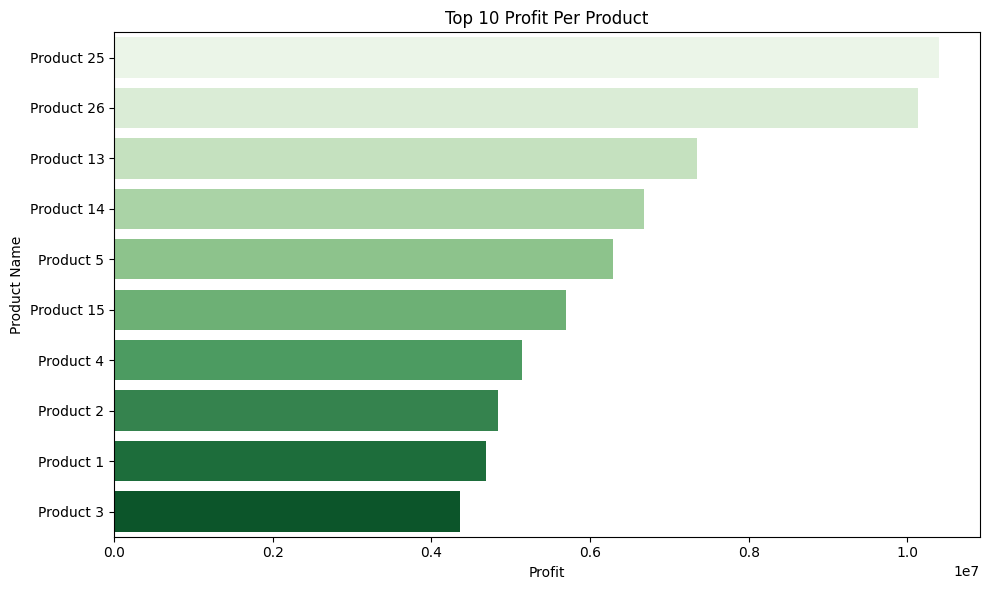

Top 10 Profit Per Product
product name
Product 26    42521347.75
Product 25    40186493.55
Product 13    27574419.75
Product 14    25893334.87
Product 5     25479991.56
Product 15    23908262.53
Product 1     20595130.39
Product 4     20585140.65
Product 2     19693022.31
Product 3     18438173.74
Name: profit, dtype: float64

Top 10 Percentage of Total Profit, Per Product
product name
Product 26    9.58
Product 25    9.05
Product 13    6.21
Product 14    5.83
Product 5     5.74
Product 15    5.39
Product 1     4.64
Product 4     4.64
Product 2     4.44
Product 3     4.15
Product 18    3.83
Product 6     3.33
Product 17    3.28
Product 20    3.18
Product 16    3.08
Product 19    2.82
Product 12    1.81
Product 28    1.77
Product 11    1.76
Product 21    1.60
Product 23    1.57
Product 8     1.57
Product 30    1.55
Product 27    1.49
Product 7     1.43
Product 10    1.36
Product 29    1.25
Product 9     1.25
Product 22    1.24
Product 24    1.16
Name: profit, dtype: float64
Percentage T

/var/folders/pp/fw2xszg126qcvrdq3_97gp0w0000gn/T/ipykernel_34674/3023268435.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


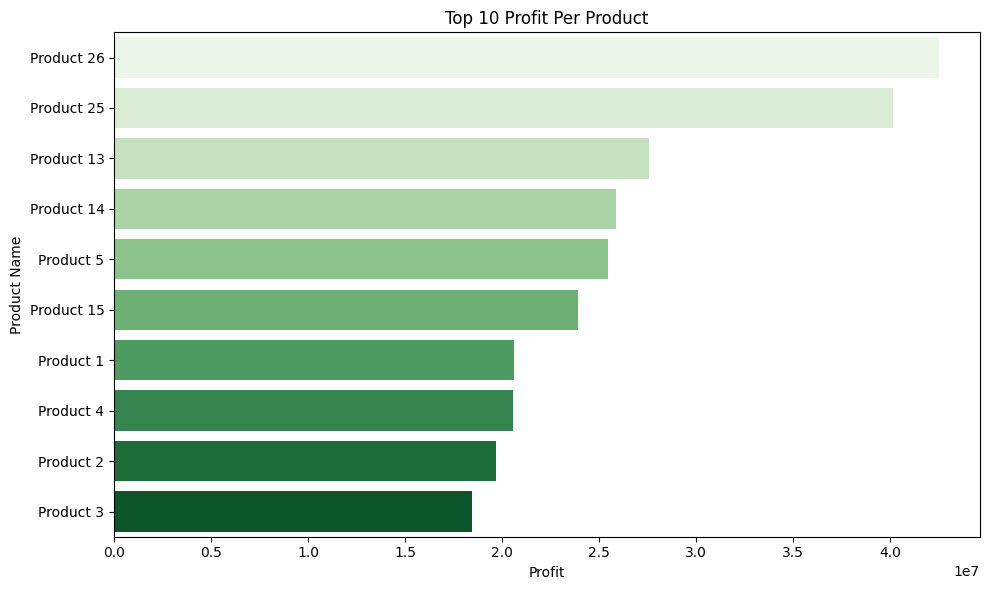

In [180]:
for eachyear in target_years:
    top10_profit_product = eachyear.groupby('product name')['profit'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Profit Per Product")
    print(top10_profit_product)
    print("")
    
    top10_profit_product_pct = (eachyear.groupby('product name')['profit'].sum().sort_values(ascending=False).pipe(lambda s: (s / s.sum() * 100).round(2)))
    print("Top 10 Percentage of Total Profit, Per Product")
    print(top10_profit_product_pct)
    print("Percentage Top 10: " + str(top10_profit_product_pct.head(10).sum()))
    print("")

    top10_profit_df = top10_profit_product.reset_index()
    top10_profit_df.columns = ['Product Name', 'Profit']

    plt.figure(figsize=(10,6))
    sns.barplot(
        data=top10_profit_df,
        x='Profit',
        y='Product Name',
        palette='Greens'
    )
    plt.title(f"Top 10 Profit Per Product")
    plt.xlabel("Profit")
    plt.ylabel("Product Name")
    plt.tight_layout()
    plt.show()

OBSERVATION

The top 10 of products is sales numbers, revenue and profit are the same: [25, 26, 13, 14, 5, 15, 2, 4, 3, 1]. The number of sales seems to be the strongest driver in revenue and profit (over profit per sale and units) Together they account for about 60% of sales, revenue and profit. 

***Average Profit Margin (%) per Sale, per Product***

Top 10 Average Profit Per Order Per Product
product name
Product 18    8363.188704
Product 5     7936.697664
Product 11    7922.641036
Product 8     7818.443448
Product 12    7724.033963
Product 28    7646.907722
Product 19    7624.197566
Product 4     7622.295030
Product 21    7621.595118
Product 1     7605.367256
Name: profit, dtype: float64

Top 10 Percentage of Average Profit Per Order Per Product
product name
Product 18    3.93
Product 5     3.73
Product 11    3.72
Product 8     3.67
Product 12    3.63
Product 28    3.59
Product 19    3.58
Product 4     3.58
Product 21    3.58
Product 1     3.57
Product 26    3.56
Product 13    3.51
Product 10    3.49
Product 17    3.42
Product 20    3.38
Product 25    3.31
Product 14    3.29
Product 16    3.24
Product 9     3.23
Product 24    3.21
Product 6     3.20
Product 3     3.19
Product 15    3.13
Product 30    3.05
Product 2     2.97
Product 23    2.96
Product 7     2.92
Product 22    2.87
Product 29    2.80
Product 27    2.69
Name: profit

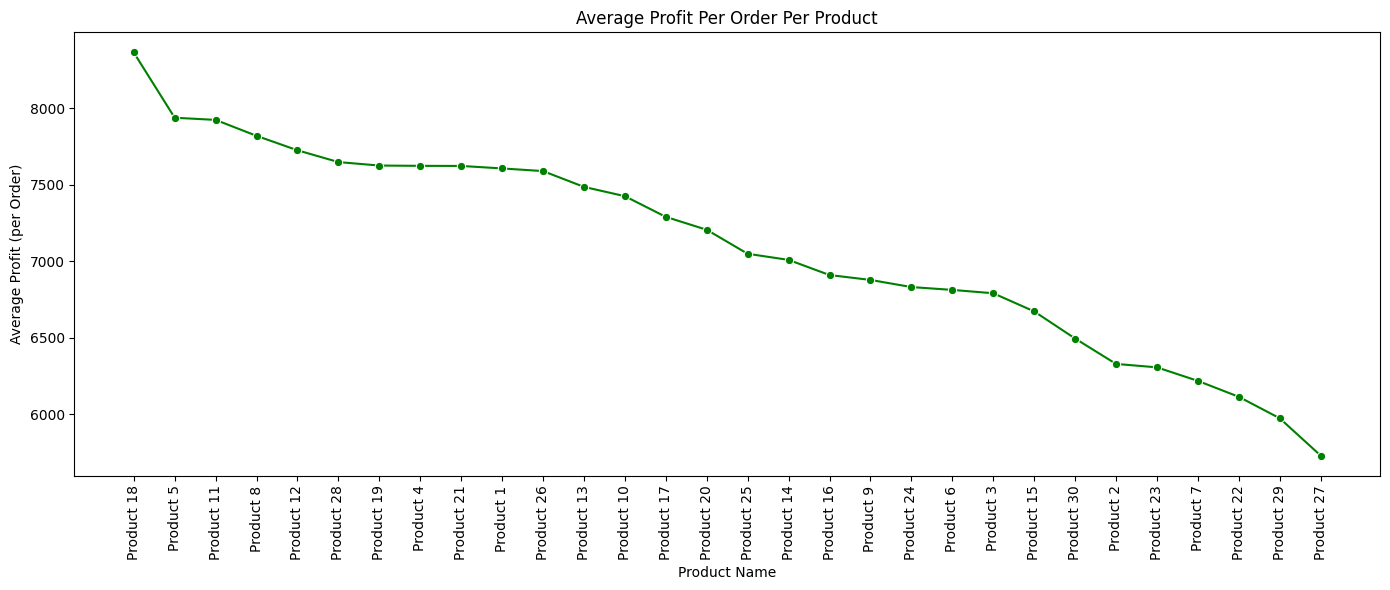

Top 10 Average Profit Per Order Per Product
product name
Product 18    8516.125093
Product 28    8142.199369
Product 5     7890.985308
Product 11    7860.053296
Product 12    7573.988644
Product 21    7478.512589
Product 26    7475.623725
Product 20    7426.411435
Product 4     7410.057829
Product 16    7387.006012
Name: profit, dtype: float64

Top 10 Percentage of Average Profit Per Order Per Product
product name
Product 18    3.95
Product 28    3.78
Product 5     3.66
Product 11    3.65
Product 12    3.52
Product 21    3.47
Product 26    3.47
Product 20    3.45
Product 4     3.44
Product 16    3.43
Product 1     3.43
Product 17    3.41
Product 10    3.39
Product 19    3.37
Product 13    3.37
Product 23    3.36
Product 8     3.36
Product 6     3.35
Product 9     3.34
Product 30    3.26
Product 14    3.24
Product 25    3.24
Product 3     3.17
Product 7     3.16
Product 15    3.13
Product 24    3.02
Product 2     3.01
Product 27    2.97
Product 22    2.82
Product 29    2.79
Name: profit

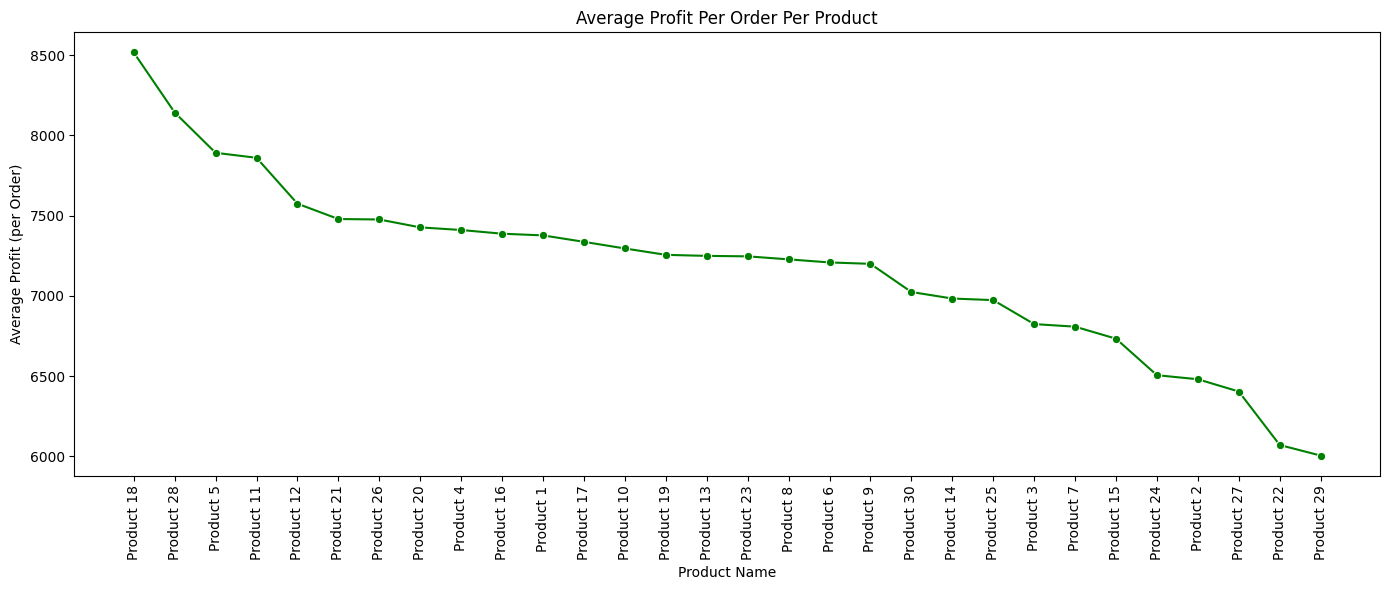

In [181]:
for eachyear in target_years:
    top10_promar_product = eachyear.groupby('product name')['profit'].mean().sort_values(ascending=False).head(10)
    print("Top 10 Average Profit Per Order Per Product")
    print(top10_promar_product)
    print("")
    
    top10_promar_product_pct = (eachyear.groupby('product name')['profit'].mean().sort_values(ascending=False).pipe(lambda s: (s / s.sum() * 100).round(2)))
    print("Top 10 Percentage of Average Profit Per Order Per Product")
    print(top10_promar_product_pct)
    print("Percentage Top 10: " + str(top10_promar_product_pct.head(10).sum()))
    print("")

    top10_profit_df = top10_promar_product.reset_index()
    top10_profit_df.columns = ['Product Name', 'Profit']

    promar_per_product = eachyear.groupby('product name')['profit'].mean().sort_values(ascending=False)
    promar_df = promar_per_product.reset_index()
    promar_df.columns = ['Product Name', 'Profit']

    plt.figure(figsize=(14,6))
    sns.lineplot(
        data=promar_df,
        x='Product Name',
        y='Profit',
        color='green',
        marker='o'
    )
    plt.xticks(rotation=90)
    plt.title(f"Average Profit Per Order Per Product")
    plt.xlabel("Product Name")
    plt.ylabel("Average Profit (per Order)")
    plt.tight_layout()
    plt.show()

Top 10 Average Profit Margin Per Order Per Product
product name
Product 9     174.192223
Product 19    172.480971
Product 7     171.351955
Product 29    170.429235
Product 23    170.351186
Product 24    170.310755
Product 11    169.570021
Product 10    169.017774
Product 18    168.868374
Product 16    168.813860
Name: profit margin, dtype: float64

Top 10 Percentage of Average Profit Margin Per Order Per Product
product name
Product 9     3.46
Product 19    3.43
Product 7     3.41
Product 29    3.39
Product 23    3.39
Product 24    3.39
Product 11    3.37
Product 10    3.36
Product 18    3.36
Product 16    3.36
Product 13    3.35
Product 20    3.35
Product 25    3.35
Product 5     3.35
Product 3     3.35
Product 26    3.34
Product 4     3.34
Product 30    3.34
Product 28    3.34
Product 17    3.33
Product 1     3.33
Product 6     3.32
Product 21    3.31
Product 12    3.29
Product 15    3.27
Product 8     3.26
Product 14    3.25
Product 2     3.23
Product 22    3.20
Product 27    3.19
N

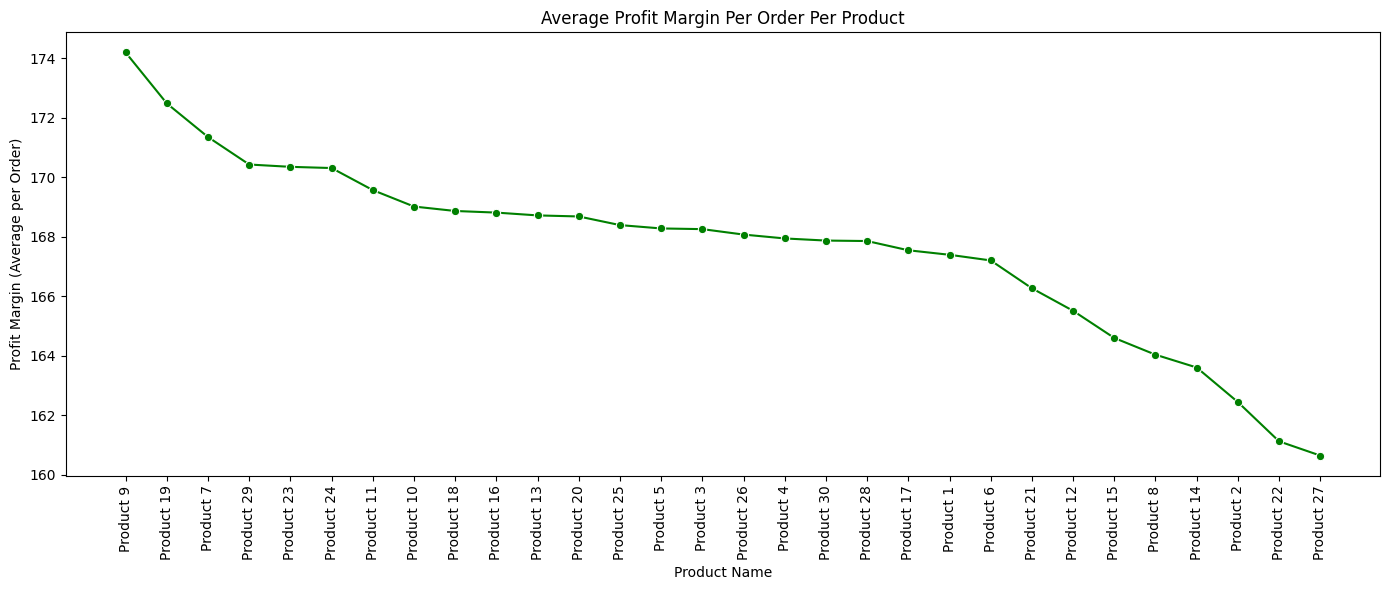

Top 10 Average Profit Margin Per Order Per Product
product name
Product 9     175.595990
Product 7     174.345667
Product 19    171.204012
Product 23    170.452360
Product 29    170.214998
Product 1     169.767787
Product 11    169.531827
Product 28    169.355163
Product 5     168.895114
Product 20    168.555470
Name: profit margin, dtype: float64

Top 10 Percentage of Average Profit Margin Per Order Per Product
product name
Product 9     3.49
Product 7     3.46
Product 19    3.40
Product 23    3.38
Product 29    3.38
Product 1     3.37
Product 11    3.37
Product 28    3.36
Product 5     3.35
Product 20    3.35
Product 16    3.34
Product 6     3.34
Product 4     3.34
Product 30    3.33
Product 17    3.33
Product 21    3.33
Product 26    3.33
Product 18    3.32
Product 24    3.32
Product 25    3.32
Product 13    3.32
Product 10    3.32
Product 3     3.31
Product 12    3.30
Product 15    3.29
Product 27    3.27
Product 14    3.26
Product 22    3.25
Product 2     3.24
Product 8     3.24
N

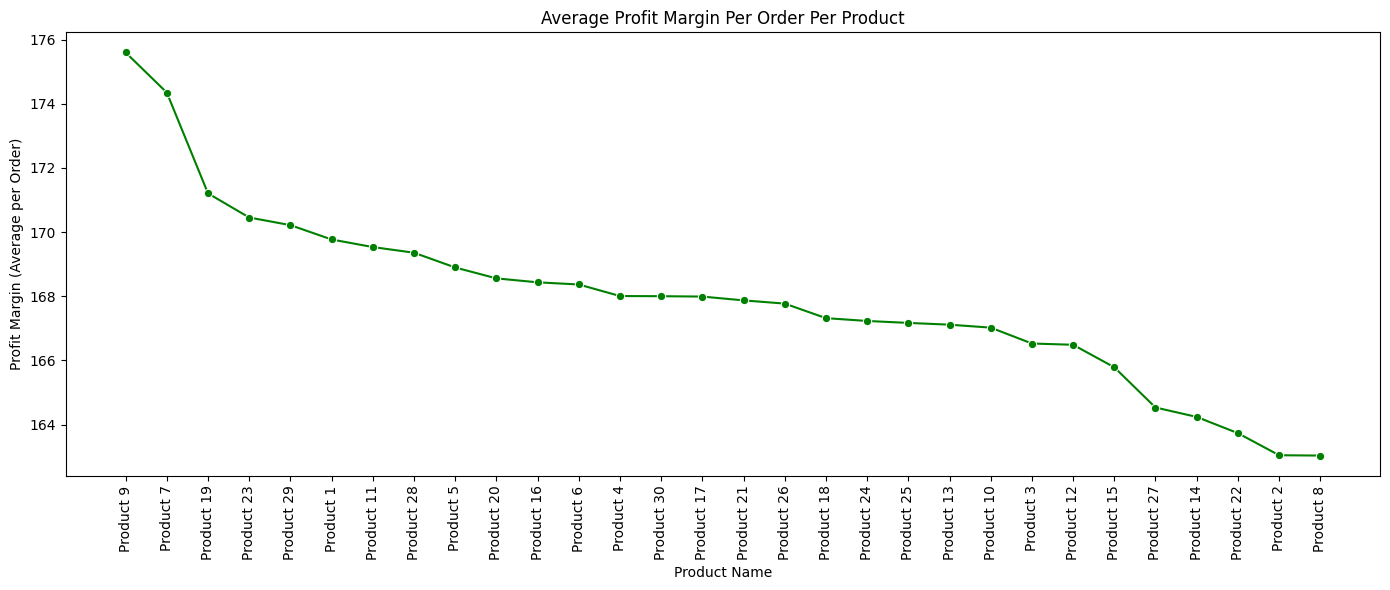

In [182]:
for eachyear in target_years:
    top10_promar_product = eachyear.groupby('product name')['profit margin'].mean().sort_values(ascending=False).head(10)
    print("Top 10 Average Profit Margin Per Order Per Product")
    print(top10_promar_product)
    print("")
    
    top10_promar_product_pct = (eachyear.groupby('product name')['profit margin'].mean().sort_values(ascending=False).pipe(lambda s: (s / s.sum() * 100).round(2)))
    print("Top 10 Percentage of Average Profit Margin Per Order Per Product")
    print(top10_promar_product_pct)
    print("Percentage Top 10: " + str(top10_promar_product_pct.head(10).sum()))
    print("")

    top10_profit_df = top10_promar_product.reset_index()
    top10_profit_df.columns = ['Product Name', 'Profit Margin']

    promar_per_product = eachyear.groupby('product name')['profit margin'].mean().sort_values(ascending=False)
    promar_df = promar_per_product.reset_index()
    promar_df.columns = ['Product Name', 'Profit Margin']

    plt.figure(figsize=(14,6))
    sns.lineplot(
        data=promar_df,
        x='Product Name',
        y='Profit Margin',
        color='green',
        marker='o'
    )
    plt.xticks(rotation=90)
    plt.title(f"Average Profit Margin Per Order Per Product")
    plt.xlabel("Product Name")
    plt.ylabel("Profit Margin (Average per Order)")
    plt.tight_layout()
    plt.show()

The top 10 products on which **on average** the most profit is made per sale differs from top 10 in sales, revenue and profit. These are: [9, 7, 19, 23, 29, 1, 11, 28, 5 , 20]. Only top-10 grossing products 1 and 5 feature in this list. On the other 8 product in the list, on average the profit rate is higher than the top 10 most selling products.

***Distribution Channels***

channel
Distributor    4791
Export         2219
Wholesale      8253
dtype: int64
channel
Wholesale      54.071939
Distributor    31.389635
Export         14.538426
Name: proportion, dtype: float64


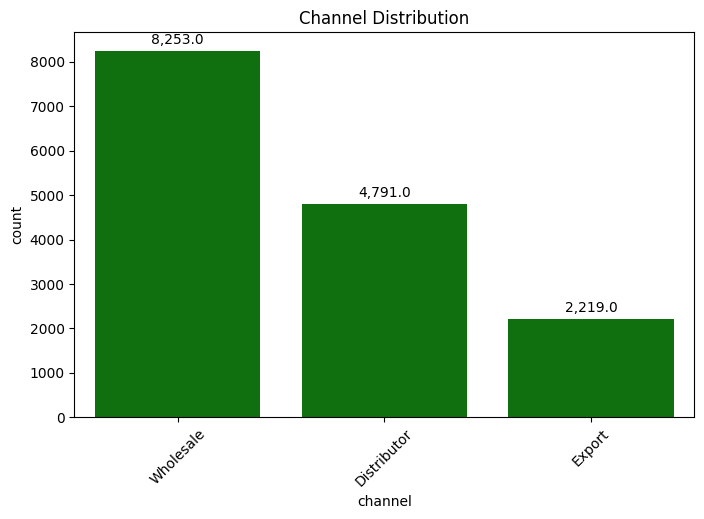

channel
Distributor    19211
Export          9152
Wholesale      33263
dtype: int64
channel
Wholesale      53.975595
Distributor    31.173531
Export         14.850875
Name: proportion, dtype: float64


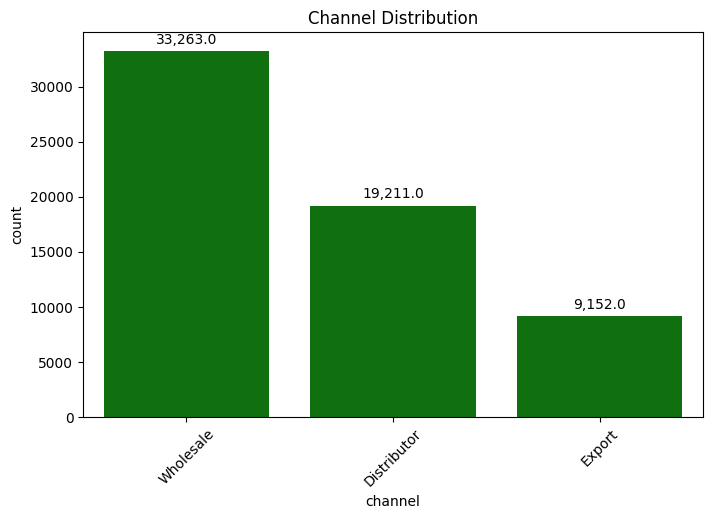

In [183]:
for eachyear in target_years:
    print(eachyear.groupby('channel').size())
    percentages = eachyear['channel'].value_counts(normalize=True) * 100
    print(percentages)
    plt.figure(figsize=(8,5))
    ax = sns.countplot(data=eachyear, x="channel", color="green", order=eachyear['channel'].value_counts().index)
    plt.title("Channel Distribution")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
    plt.show()


OBSERVATION

Wholesale accounts for over 50% of the orders. Twice the size of Distributors, trice the size of Export in #orders 

channel
Distributor    31.563312
Export         14.851589
Wholesale      53.585099
Name: profit_million, dtype: float64


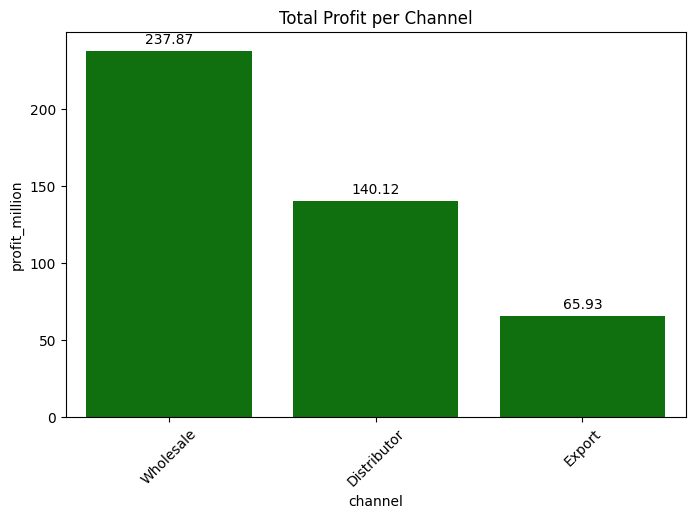

channel
Distributor    31.563312
Export         14.851589
Wholesale      53.585099
Name: profit_million, dtype: float64


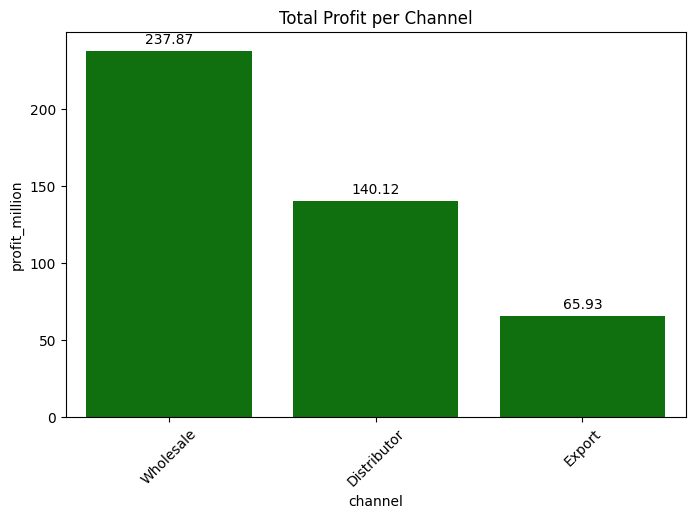

In [184]:
for year in target_years:   
    totals = eachyear.groupby('channel')['profit'].sum().reset_index()
    totals['profit_million'] = totals['profit'] / 1_000_000
    totals = totals.sort_values('profit_million', ascending=False)
    channel_totals = totals.groupby('channel')['profit_million'].sum()
    percentages = channel_totals / channel_totals.sum() * 100
    print(percentages)


    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=totals, x="channel", y="profit_million", color="green")
    plt.title("Total Profit per Channel")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    plt.show()

OBSERVATION

Wholesale accounts for over 50% of the total profit. Twice the size of Distributors, trice the size of Export in total profit

       channel       profit
0  Distributor  7293.494546
1       Export  7203.772357
2    Wholesale  7151.311329


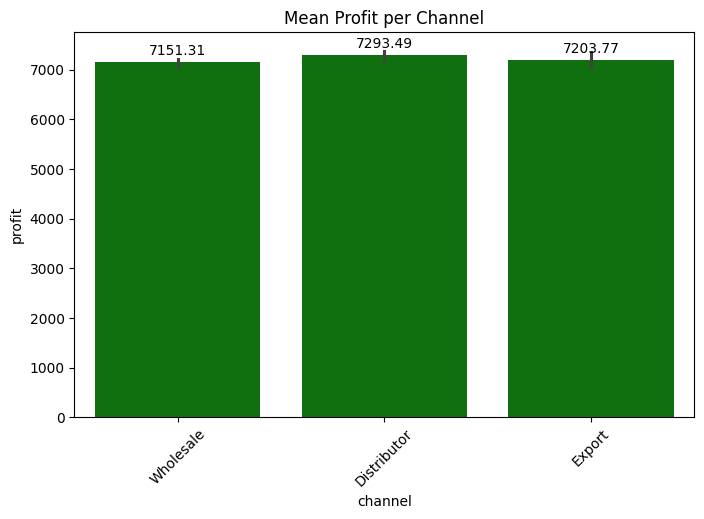

       channel       profit
0  Distributor  7293.494546
1       Export  7203.772357
2    Wholesale  7151.311329


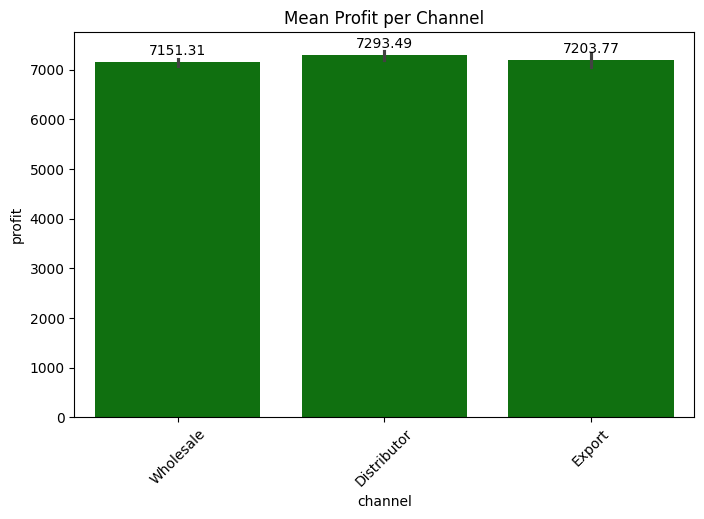

In [185]:
for year in target_years:     
    print(eachyear.groupby('channel')['profit'].mean().reset_index())
    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=eachyear, x="channel", y="profit", color="green", estimator="mean", order=eachyear['channel'].value_counts().index)
    plt.title("Mean Profit per Channel")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    plt.show()

OBSERVATION

The mean profit per order is equal between channels

***Regions***

      region  count
0       West   4636
1      South   4124
2    Midwest   3967
3  Northeast   2536
      region  count  percentage
0       West   4636   30.374107
1      South   4124   27.019590
2    Midwest   3967   25.990959
3  Northeast   2536   16.615344


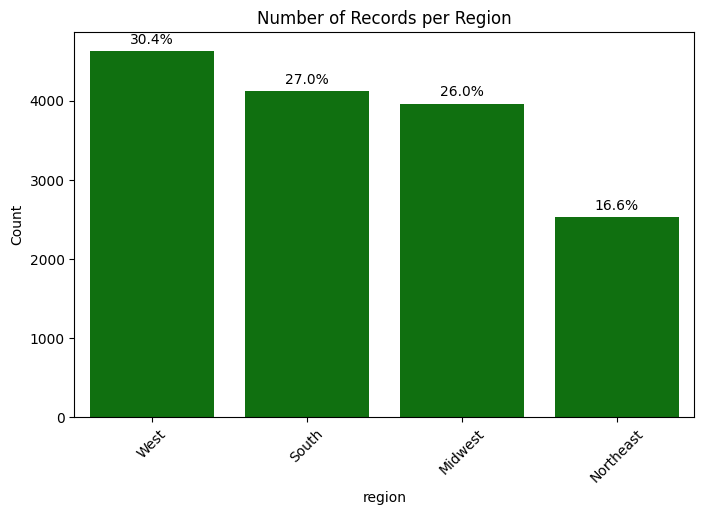

      region  count
0       West  18799
1      South  16636
2    Midwest  15960
3  Northeast  10231
      region  count  percentage
0       West  18799   30.504982
1      South  16636   26.995099
2    Midwest  15960   25.898160
3  Northeast  10231   16.601759


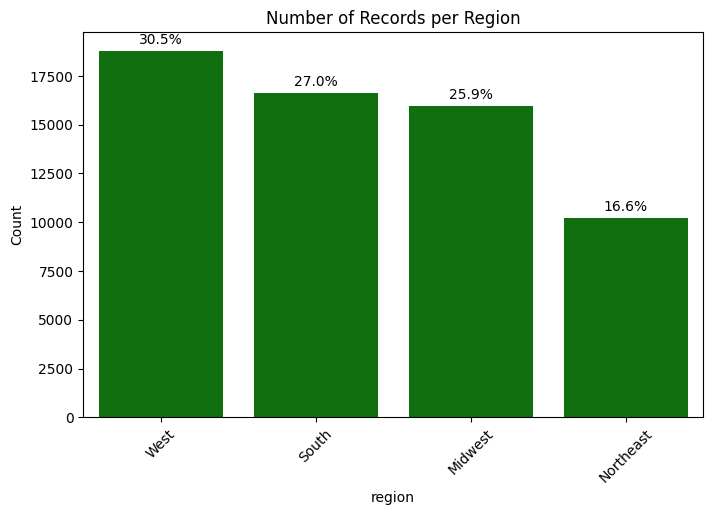

In [186]:
for eachyear in target_years:
    region_counts = eachyear['region'].value_counts().reset_index()
    region_counts.columns = ['region', 'count']
    print(region_counts)

    region_counts['percentage'] = region_counts['count'] / region_counts['count'].sum() * 100
    region_counts = region_counts.sort_values('count', ascending=False).reset_index(drop=True)
    print(region_counts)

    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=region_counts, x='region', y='count', color="green", order=region_counts['region'])

    plt.title("Number of Records per Region")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    for p, pct in zip(ax.patches, region_counts['percentage']):
        ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    plt.show()

OBSERVATION

The West is the region that accounts for the most orders and profit, whereas the North East account for the lowest orders and profit. The West has almost double the amount of orders (and profit) as the North East

      region       profit
0    Midwest  7182.331986
1  Northeast  7242.820150
2      South  7365.565160
3       West  6986.075518
      region       profit  percentage
0      South  7365.565160   25.595504
1  Northeast  7242.820150   25.168962
2    Midwest  7182.331986   24.958765
3       West  6986.075518   24.276769


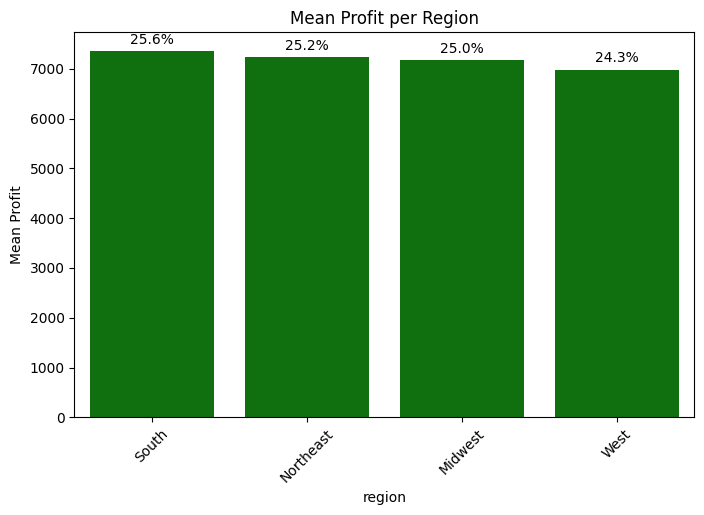

      region       profit
0    Midwest  7239.040264
1  Northeast  7239.549293
2      South  7224.758841
3       West  7134.651712
      region       profit  percentage
0  Northeast  7239.549293   25.104200
1    Midwest  7239.040264   25.102435
2      South  7224.758841   25.052912
3       West  7134.651712   24.740452


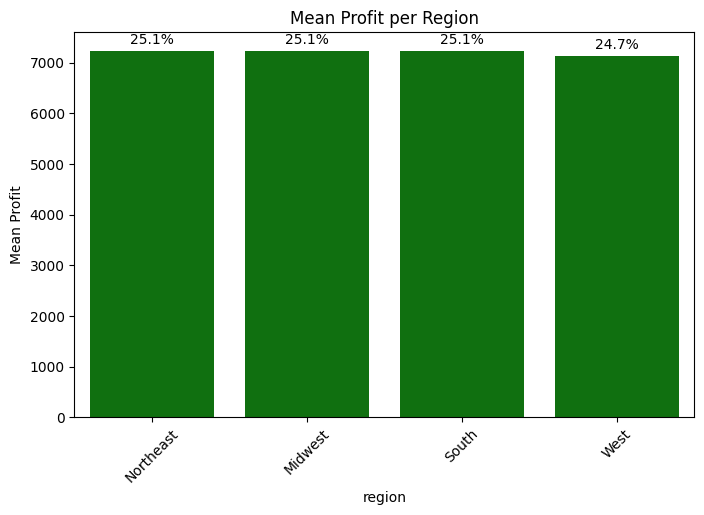

In [187]:
for eachyear in target_years:
    region_profit = eachyear.groupby('region')['profit'].mean().reset_index()
    print(region_profit)

    region_profit['percentage'] = region_profit['profit'] / region_profit['profit'].sum() * 100
    region_profit = region_profit.sort_values('profit', ascending=False).reset_index(drop=True)
    print(region_profit) 

    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=region_profit, x='region', y='profit', color="green", order=region_profit['region'])

    plt.title("Mean Profit per Region")
    plt.ylabel("Mean Profit")
    plt.xticks(rotation=45)
    for p, pct in zip(ax.patches, region_profit['percentage']):
        ax.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
    plt.show()

OBSERVATION

The mean profit per order is equal over each of the four regions